In [1]:
#AUTO INSURANCE CLAIM PREDICTION 


In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
# Load the 'Auto Insurance Claim' data

Auto_Claim = pd.read_csv(r"C:\Users\sriha\Data Science\CAPSTONE PROJECT\synthetic data generated\auto claim insurance data set was synthetic generated\Auto_Insurance_claim_synthetic_genereated_data.csv", header=0)

# Copy the file to back-up

Auto_Claim_bk = Auto_Claim.copy()

# Display first 5 rows in the dataset

Auto_Claim_bk.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,11/4/2019,VJ-130653912,Van,1176.40,EA,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,NaN,NaN,No
1,4/8/2018,BI-158124192,Car,1587.37,EA,OR,29,Female,Married,Masters,ITENGINEER,18,Pleasure,10875,1,0,Basic,CL000026353,Yes,3/22/2018,Yes,No,No,18623.00,BMW,23710.32,Rural,Major,Yes
2,8/3/2015,DZ-175413016,Car,1268.38,IA,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,NaN,NaN,No
3,6/8/2015,QX-179005448,Car,1921.00,IA,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,NaN,NaN,No
4,1/4/2018,KM-194622292,Car,1582.98,EA,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,NaN,NaN,No


In [4]:
# Display the size of the dataset

Auto_Claim_bk.shape

(285130, 29)

In [5]:
# Display the columns in concrete dataset

Auto_Claim_bk.columns

Index(['Inception_Date', 'Policy_Number', 'Policy_Type', 'Policy_Premium',
       'Channel', 'State', 'Age', 'Gender', 'Marital_Status', 'Education',
       'Profession', 'Driving_Exp', 'Vehicle_Usage', 'Annual_Miles',
       'Previous_Citations', 'Prevous_Accidents', 'Coverage_Type',
       'Claim_Number', 'Umbrella_Policy', 'Accident_Date', 'Police_File',
       'Any_Eye_Witness', 'Hired_Attorney', 'Claim_Paid_Out', 'Make',
       'Vehicle_Cost', 'Road_Type', 'Accident_Severity', 'Claimed'],
      dtype='object')

In [6]:
# DISPLAY INFO

Auto_Claim_bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285130 entries, 0 to 285129
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Inception_Date      285130 non-null  object 
 1   Policy_Number       285130 non-null  object 
 2   Policy_Type         285130 non-null  object 
 3   Policy_Premium      285130 non-null  float64
 4   Channel             285130 non-null  object 
 5   State               285130 non-null  object 
 6   Age                 285130 non-null  int64  
 7   Gender              285130 non-null  object 
 8   Marital_Status      285130 non-null  object 
 9   Education           285130 non-null  object 
 10  Profession          285130 non-null  object 
 11  Driving_Exp         285130 non-null  int64  
 12  Vehicle_Usage       285130 non-null  object 
 13  Annual_Miles        285130 non-null  int64  
 14  Previous_Citations  285130 non-null  int64  
 15  Prevous_Accidents   285130 non-nul

In [7]:
#STEP-1:CHECK THE DUPLICATE AND LOW VARIATION DATA

In [8]:
#CHECK FOR DUPLICTAE VALUES
#Displaying Duplicate values with in DATASET, if avialble

Auto_Claim_bk_dup = Auto_Claim_bk[Auto_Claim_bk.duplicated(keep='last')]
Auto_Claim_bk_dup

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [9]:
#IF EXIST DELETE THE DUPLICATE VALUES
#Remove the identified duplicate records 

Auto_Claim_bk = Auto_Claim_bk.drop_duplicates()
Auto_Claim_bk.shape

(285130, 29)

In [10]:
#STEP-2:IDENTIFYING AND ADDRESSING THE MISSING VALUES AND VARIABLES

In [11]:
# Identify the missing data in all variables

Auto_Claim_bk.isnull().sum()

Inception_Date             0
Policy_Number              0
Policy_Type                0
Policy_Premium             0
Channel                    0
State                      0
Age                        0
Gender                     0
Marital_Status             0
Education                  0
Profession                 0
Driving_Exp                0
Vehicle_Usage              0
Annual_Miles               0
Previous_Citations         0
Prevous_Accidents          0
Coverage_Type              0
Claim_Number              39
Umbrella_Policy            0
Accident_Date            126
Police_File                0
Any_Eye_Witness            0
Hired_Attorney             0
Claim_Paid_Out             0
Make                       0
Vehicle_Cost               0
Road_Type             256211
Accident_Severity     256650
Claimed                    0
dtype: int64

In [12]:
# functions for better visualization of the posterior plots

def resizeplot():
    plt.figure(figsize=(12,6))
    
# function for correlations plots

def resizecorr():
    plt.figure(figsize=(15,7))

<Axes: >

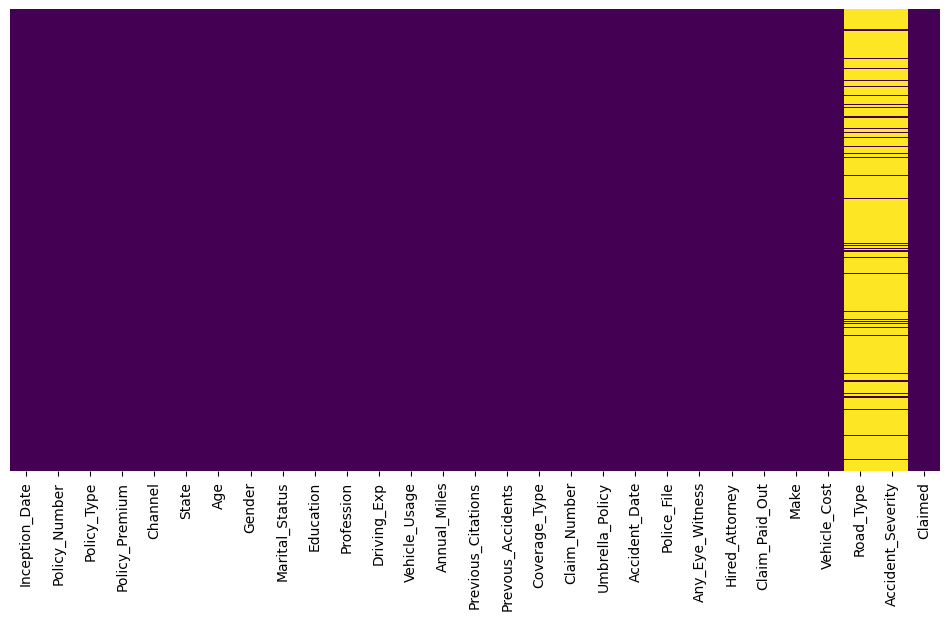

In [13]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(Auto_Claim_bk.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
#MUTATION TECHNIQUES(FOR FILLING THE MISSING VALUES)

In [15]:
# Identify the numerical and categorical variables

num_vars = Auto_Claim_bk.columns[Auto_Claim_bk.dtypes != 'object']
cat_vars = Auto_Claim_bk.columns[Auto_Claim_bk.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Policy_Premium', 'Age', 'Driving_Exp', 'Annual_Miles',
       'Previous_Citations', 'Prevous_Accidents', 'Claim_Paid_Out',
       'Vehicle_Cost'],
      dtype='object')
Index(['Inception_Date', 'Policy_Number', 'Policy_Type', 'Channel', 'State',
       'Gender', 'Marital_Status', 'Education', 'Profession', 'Vehicle_Usage',
       'Coverage_Type', 'Claim_Number', 'Umbrella_Policy', 'Accident_Date',
       'Police_File', 'Any_Eye_Witness', 'Hired_Attorney', 'Make', 'Road_Type',
       'Accident_Severity', 'Claimed'],
      dtype='object')


In [16]:
# Use KNNImputer to address missing values
#KNNImputer-used only for replacing numerical values

#from sklearn.impute import KNNImputer

#imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',
#                        copy=True, add_indicator=False)

#Auto_Claim_bk['Age'] = imputer_str.fit_transform(Auto_Claim_bk[['Age']])

In [17]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

Auto_Claim_bk['Claim_Number'] = imputer_str.fit_transform(Auto_Claim_bk[['Claim_Number']])
Auto_Claim_bk['Accident_Date'] = imputer_str.fit_transform(Auto_Claim_bk[['Accident_Date']])
Auto_Claim_bk['Road_Type'] = imputer_str.fit_transform(Auto_Claim_bk[['Road_Type']])
Auto_Claim_bk['Accident_Severity'] = imputer_str.fit_transform(Auto_Claim_bk[['Accident_Severity']])


In [18]:
Auto_Claim_bk.isnull().sum()

Inception_Date        0
Policy_Number         0
Policy_Type           0
Policy_Premium        0
Channel               0
State                 0
Age                   0
Gender                0
Marital_Status        0
Education             0
Profession            0
Driving_Exp           0
Vehicle_Usage         0
Annual_Miles          0
Previous_Citations    0
Prevous_Accidents     0
Coverage_Type         0
Claim_Number          0
Umbrella_Policy       0
Accident_Date         0
Police_File           0
Any_Eye_Witness       0
Hired_Attorney        0
Claim_Paid_Out        0
Make                  0
Vehicle_Cost          0
Road_Type             0
Accident_Severity     0
Claimed               0
dtype: int64

<Axes: >

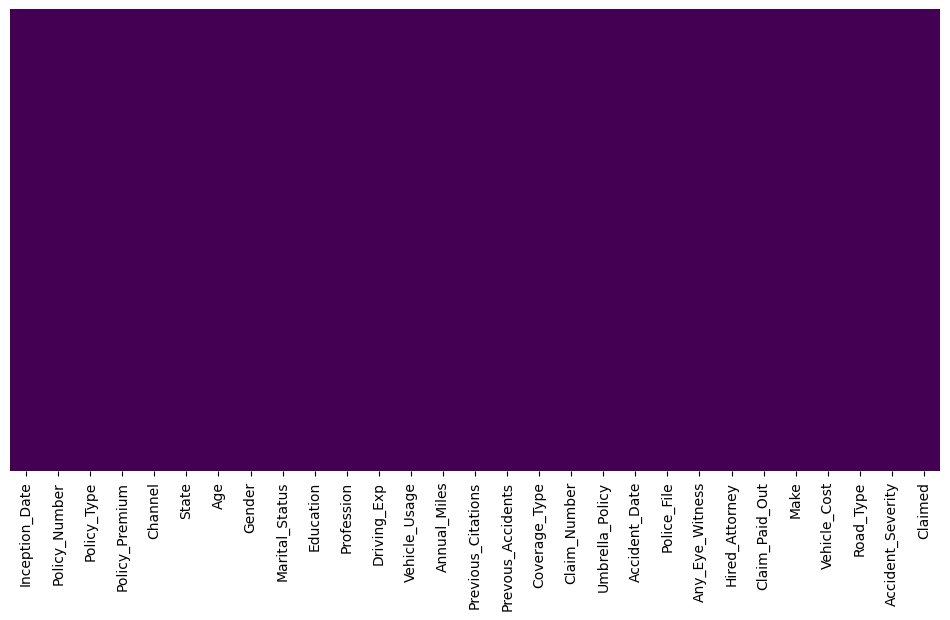

In [19]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(Auto_Claim_bk.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
Auto_Claim_bk.sample(10)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
2035,3/20/2019,RR-172882457,Car,1757.83,IA,NV,46,Male,Married,High School,Carpenter,33,Commute,11594,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Hyundai,24314.31,Semi Urban,Major,No
83930,9/8/2015,IB-178498502,Truck,1827.92,IA,CA,33,Male,Married,High School,Carpenter,15,Business,21347,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Volvo,24242.89,Semi Urban,Major,No
200395,11/25/2019,BH-123684745,Car,1459.97,EA,OR,55,Female,Married,PhD,Professor,34,Pleasure,13283,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.44,Honda,23906.85,Semi Urban,Major,No
229172,10/16/2014,IN-152061959,Car,1780.15,EA,CA,50,Female,Married,High School,ITENGINEER,37,Business,26222,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Toyota,24619.35,Semi Urban,Major,No
222873,12/12/2016,HL-180179646,Car,1700.46,IA,NV,56,Male,Married,High School,Worker,36,Commute,21539,0,1,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Volvo,36735.09,Semi Urban,Major,No
37369,3/7/2015,AI-158354505,Car,1609.65,EA,NV,52,Female,Married,PhD,Professor,36,Pleasure,16539,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,Nissan,23906.35,Semi Urban,Major,No
30884,1/8/2019,VG-186771842,Car,1770.21,EA,CA,30,Male,Single,PhD,Teacher,14,Pleasure,17719,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,3.76,Datsun,13715.00,Semi Urban,Major,No
271025,9/24/2016,DI-197523521,Car,1687.85,IA,CA,90,Female,Married,High School,Carpenter,68,Pleasure,15846,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Datsun,23423.61,Semi Urban,Major,No
239626,2/12/2014,BO-198129233,Van,1651.28,EA,CA,45,Female,Married,Masters,Engineer,10,Pleasure,23616,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Hyundai,14325.02,Semi Urban,Major,No
255503,12/20/2015,JX-175626245,Truck,1679.33,IA,NV,39,Female,Married,Masters,Engineer,22,Pleasure,23223,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,14446.51,Semi Urban,Major,No


In [21]:
#STEP-3:HANDLING THE OUTLIERS

In [22]:
#OUTLIERS ARE PERFORMED ONLY FOR CONTINOUS DATA OR CONTINOUS VARIABLES

In [23]:
# Display "Descriptive Statistical Analysis"

Auto_Claim_bk.describe().T

,count,mean,std,min,25%,50%,75%,max
Policy_Premium,285130.0,1564.061418,163.863521,1045.93,1453.7600,1560.030,1675.1075,2205.86
Age,285130.0,49.528457,18.402776,16.00,36.0000,48.000,63.0000,95.00
Driving_Exp,285130.0,30.381089,18.480502,0.00,16.0000,30.000,47.0000,74.00
Annual_Miles,285130.0,19593.167980,7367.392684,8425.00,13991.0000,16357.000,25332.0000,40443.00
Previous_Citations,285130.0,0.196146,0.397081,0.00,0.0000,0.000,0.0000,1.00
Prevous_Accidents,285130.0,0.330705,0.568392,0.00,0.0000,0.000,1.0000,2.00
Claim_Paid_Out,285130.0,1489.564096,5620.656085,0.00,0.0000,0.000,4.6600,38119.45
Vehicle_Cost,285130.0,25917.744646,11364.030058,11862.01,19252.9125,23814.895,28114.6650,77521.06


In [24]:
# Identify the numerical and categorical variables

num_vars = Auto_Claim_bk.columns[Auto_Claim_bk.dtypes != 'object']
cat_vars = Auto_Claim_bk.columns[Auto_Claim_bk.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Policy_Premium', 'Age', 'Driving_Exp', 'Annual_Miles',
       'Previous_Citations', 'Prevous_Accidents', 'Claim_Paid_Out',
       'Vehicle_Cost'],
      dtype='object')
Index(['Inception_Date', 'Policy_Number', 'Policy_Type', 'Channel', 'State',
       'Gender', 'Marital_Status', 'Education', 'Profession', 'Vehicle_Usage',
       'Coverage_Type', 'Claim_Number', 'Umbrella_Policy', 'Accident_Date',
       'Police_File', 'Any_Eye_Witness', 'Hired_Attorney', 'Make', 'Road_Type',
       'Accident_Severity', 'Claimed'],
      dtype='object')


In [25]:
#Age

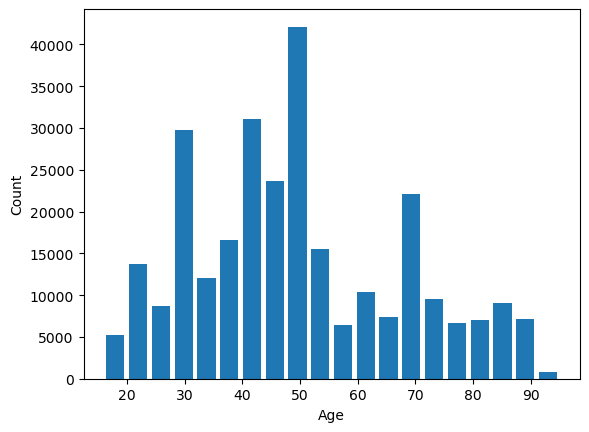

In [26]:
# Plot Histogram

plt.hist(Auto_Claim_bk.Age, bins=20, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

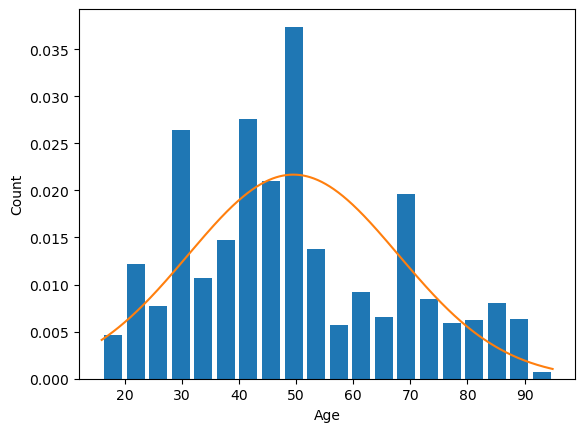

In [27]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk.Age.min(),Auto_Claim_bk.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk.Age.mean(),Auto_Claim_bk.Age.std()))

In [28]:
# Eliminate the outlier in 'Age' and write data to new file

In [29]:
# Calculate upper limit
Age_UL = round(Auto_Claim_bk.Age.mean() + 3 * Auto_Claim_bk.Age.std(),3)
Age_UL

104.737

In [30]:
# Calculate Lower limit
Age_LL = round(Auto_Claim_bk.Age.mean() - 3 * Auto_Claim_bk.Age.std(),3)
Age_LL

-5.68

In [31]:
Auto_Claim_bk02 = Auto_Claim_bk[(Auto_Claim_bk.Age > Age_LL) & (Auto_Claim_bk.Age <Age_UL)]
Auto_Claim_bk02.shape

(285130, 29)

In [32]:
# Display the outlier in the dataset

Auto_Claim_bk[(Auto_Claim_bk.Age > Age_UL) & (Auto_Claim_bk.Age > Age_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [33]:
#Policy_Premium

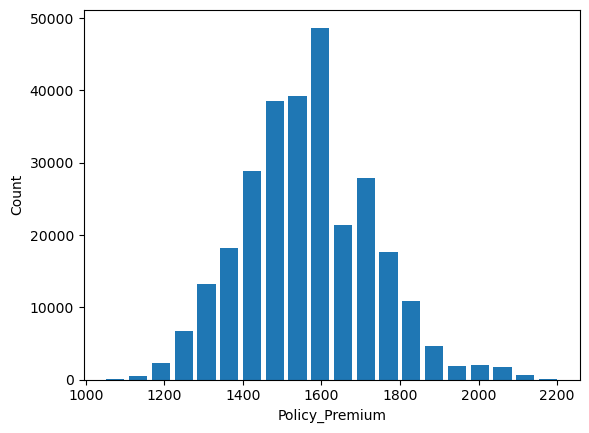

In [34]:
# Plot Histogram

plt.hist(Auto_Claim_bk.Policy_Premium, bins=20, rwidth=0.8)
plt.xlabel('Policy_Premium')
plt.ylabel('Count')
plt.show()

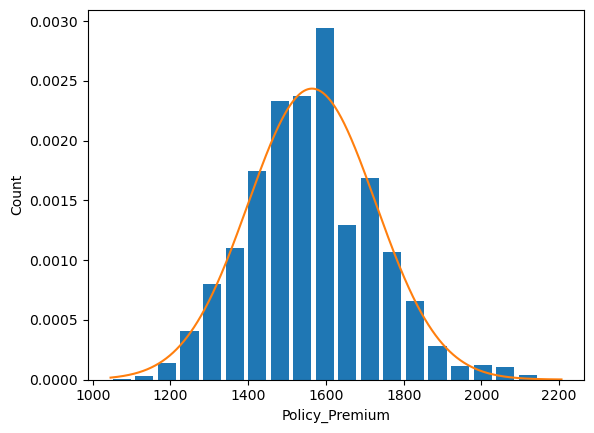

In [35]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk.Policy_Premium, bins=20, rwidth=0.8, density=True)
plt.xlabel('Policy_Premium')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk.Policy_Premium.min(),Auto_Claim_bk.Policy_Premium.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk.Policy_Premium.mean(),Auto_Claim_bk.Policy_Premium.std()))

In [36]:
# Eliminate the outlier in 'Policy_Premium' and write data to new file

In [37]:
# Calculate upper limit
Policy_Premium_UL = round(Auto_Claim_bk.Policy_Premium.mean() + 3 * Auto_Claim_bk.Policy_Premium.std(),3)
Policy_Premium_UL

2055.652

In [38]:
# Calculate Lower limit
Policy_Premium_LL = round(Auto_Claim_bk.Policy_Premium.mean() - 3 * Auto_Claim_bk.Policy_Premium.std(),3)
Policy_Premium_LL

1072.471

In [39]:
# Display the outlier in the dataset

Auto_Claim_bk[(Auto_Claim_bk.Policy_Premium > Policy_Premium_UL) & (Auto_Claim_bk.Policy_Premium > Age_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
11,11/25/2010,VV-176196999,Car,2159.97,IA,CA,34,Male,Single,High School,Student,4,Pleasure,14523,1,1,Balanced,CL000010502,No,2/1/2016,Yes,Yes,Yes,35095.65,Datsun,23244.30,Urban,Minor,Yes
292,5/10/2019,OT-148948839,Car,2131.50,IA,CA,32,Female,Single,High School,Student,4,Pleasure,14708,1,1,Balanced,CL000005896,No,5/29/2019,Yes,Yes,Yes,34362.30,Datsun,12553.03,Semi Urban,Fatal,Yes
346,1/7/2012,SA-198386699,Car,2073.91,IA,CA,30,Male,Single,High School,Student,3,Pleasure,16084,1,1,Balanced,CL000029468,No,4/24/2018,Yes,Yes,Yes,35154.72,Datsun,23271.47,Rural,Major,Yes
509,12/20/2018,IC-193087941,Car,2066.92,IA,CA,26,Male,Single,High School,Student,4,Pleasure,14067,1,1,Balanced,CL000018922,No,2/29/2016,Yes,Yes,Yes,33970.33,Datsun,22563.36,Semi Urban,Minor,Yes
533,7/15/2019,MV-152141965,Car,2124.09,IA,CA,17,Male,Single,High School,Student,4,Pleasure,16828,1,1,Balanced,CL000025014,No,5/31/2019,Yes,Yes,Yes,32642.68,Datsun,22742.34,Urban,Major,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284555,10/2/2018,LS-125415457,Car,2111.65,IA,OR,86,Male,Divorced,PhD,Manager,72,Pleasure,31843,1,1,Enhanced,CL000009703,Yes,12/9/2018,Yes,No,No,13623.49,Bugatti,23549.75,Semi Urban,Fatal,Yes
284624,11/13/2012,OE-162929550,Car,2127.61,IA,CA,20,Male,Single,High School,Student,4,Pleasure,14850,1,1,Balanced,CL000014714,No,10/21/2019,Yes,Yes,Yes,32477.13,Datsun,22715.61,Semi Urban,Minor,Yes
284695,9/27/2017,EV-177935385,Car,2124.00,EA,AZ,46,Male,Married,PhD,Manager,60,Business,28641,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,Lamborghini,23754.53,Semi Urban,Major,No
284908,10/6/2018,TQ-145760132,Car,2087.78,IA,AZ,84,Male,Married,PhD,Manager,63,Business,24935,1,1,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Lamborghini,38482.62,Semi Urban,Major,No


In [40]:
Auto_Claim_bk.shape

(285130, 29)

In [41]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk03 = Auto_Claim_bk[(Auto_Claim_bk.Policy_Premium > Policy_Premium_LL) & (Auto_Claim_bk.Policy_Premium <Policy_Premium_UL)]
Auto_Claim_bk03.shape

(283404, 29)

In [42]:
#Driving_Exp

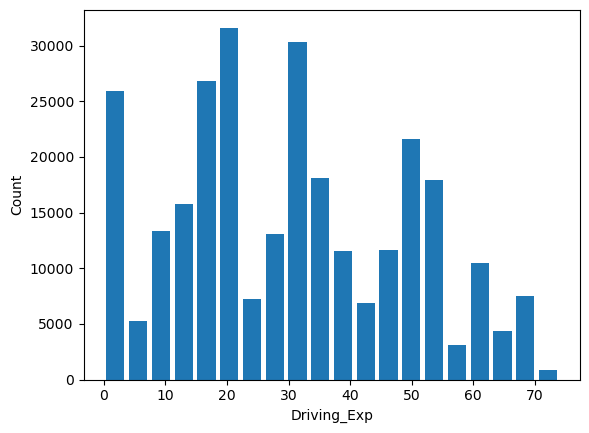

In [43]:
# Plot Histogram

plt.hist(Auto_Claim_bk03.Driving_Exp, bins=20, rwidth=0.8)
plt.xlabel('Driving_Exp')
plt.ylabel('Count')
plt.show()

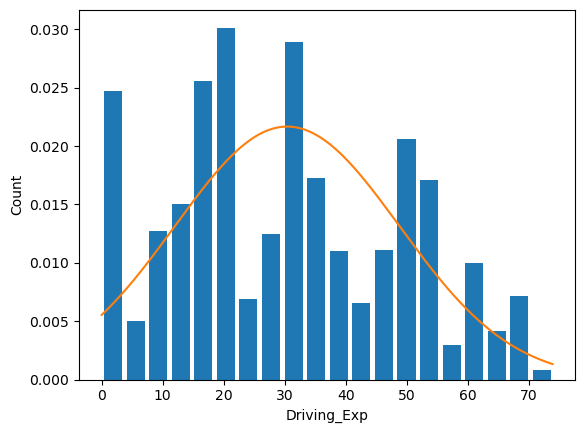

In [44]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk03.Driving_Exp, bins=20, rwidth=0.8, density=True)
plt.xlabel('Driving_Exp')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk03.Driving_Exp.min(),Auto_Claim_bk03.Driving_Exp.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk03.Driving_Exp.mean(),Auto_Claim_bk03.Driving_Exp.std()))

In [45]:
# Eliminate the outlier in 'Driving_Exp' and write data to new file

In [46]:
# Calculate upper limit
Driving_Exp_UL = round(Auto_Claim_bk03.Driving_Exp.mean() + 3 * Auto_Claim_bk03.Driving_Exp.std(),3)
Driving_Exp_UL

85.615

In [47]:
# Calculate Lower limit
Driving_Exp_LL = round(Auto_Claim_bk03.Driving_Exp.mean() - 3 * Auto_Claim_bk03.Driving_Exp.std(),3)
Driving_Exp_LL

-24.821

In [48]:
# Display the outlier in the dataset

Auto_Claim_bk03[(Auto_Claim_bk03.Driving_Exp > Driving_Exp_UL) & (Auto_Claim_bk03.Driving_Exp > Driving_Exp_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [49]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk04 = Auto_Claim_bk03[(Auto_Claim_bk03.Driving_Exp > Driving_Exp_LL) & (Auto_Claim_bk03.Driving_Exp < Driving_Exp_UL)]
Auto_Claim_bk04.shape

(283404, 29)

In [50]:
#Annual_Miles

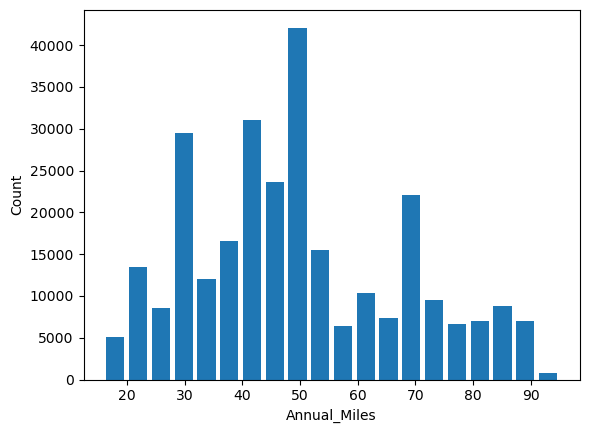

In [51]:
# Plot Histogram

plt.hist(Auto_Claim_bk04.Age, bins=20, rwidth=0.8)
plt.xlabel('Annual_Miles')
plt.ylabel('Count')
plt.show()

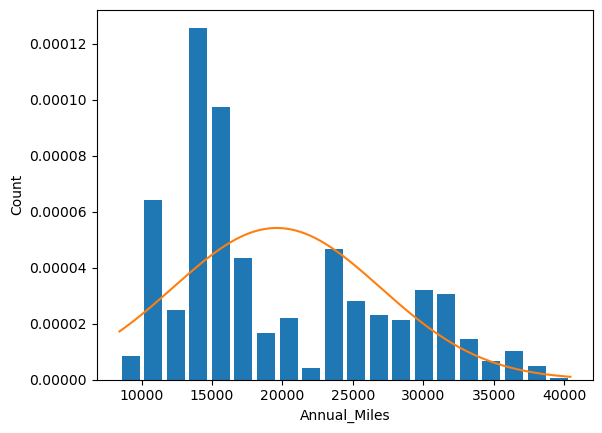

In [52]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk04.Annual_Miles, bins=20, rwidth=0.8, density=True)
plt.xlabel('Annual_Miles')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk04.Annual_Miles.min(),Auto_Claim_bk04.Annual_Miles.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk04.Annual_Miles.mean(),Auto_Claim_bk04.Annual_Miles.std()))

In [53]:
# Eliminate the outlier in 'Annual_Miles' and write data to new file

In [54]:
# Calculate upper limit
Annual_Miles_UL = round(Auto_Claim_bk04.Annual_Miles.mean() + 3 * Auto_Claim_bk04.Annual_Miles.std(),3)
Annual_Miles_UL

41696.858

In [55]:
# Calculate Lower limit
Annual_Miles_LL = round(Auto_Claim_bk04.Annual_Miles.mean() - 3 * Auto_Claim_bk04.Annual_Miles.std(),3)
Annual_Miles_LL

-2518.738

In [56]:
# Display the outlier in the dataset

Auto_Claim_bk04[(Auto_Claim_bk04.Annual_Miles > Annual_Miles_UL) & (Auto_Claim_bk04.Annual_Miles > Annual_Miles_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [57]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk05 = Auto_Claim_bk04[(Auto_Claim_bk04.Annual_Miles > Annual_Miles_LL) & (Auto_Claim_bk04.Annual_Miles < Annual_Miles_UL)]
Auto_Claim_bk05.shape

(283404, 29)

In [58]:
#Previous_Citations

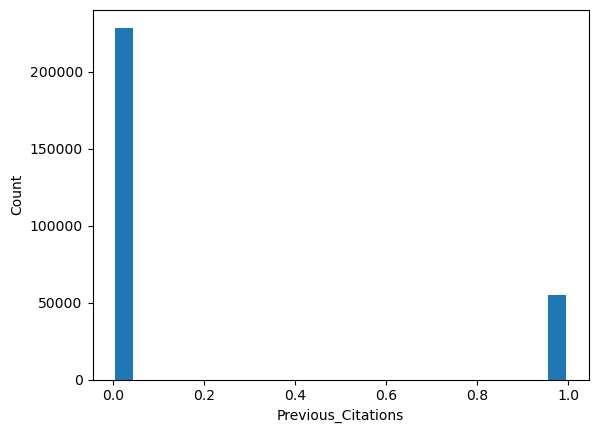

In [59]:
# Plot Histogram

plt.hist(Auto_Claim_bk05.Previous_Citations, bins=20, rwidth=0.8)
plt.xlabel('Previous_Citations')
plt.ylabel('Count')
plt.show()

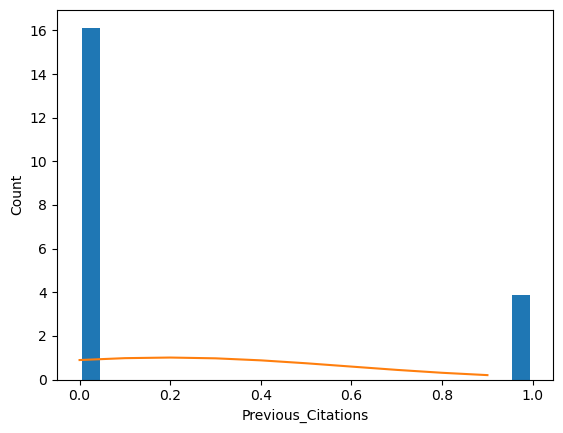

In [60]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk05.Previous_Citations, bins=20, rwidth=0.8, density=True)
plt.xlabel('Previous_Citations')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk05.Previous_Citations.min(),Auto_Claim_bk05.Previous_Citations.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk05.Previous_Citations.mean(),Auto_Claim_bk05.Previous_Citations.std()))

In [61]:
# Eliminate the outlier in 'Previous_Citations' and write data to new file

In [62]:
# Calculate upper limit
Previous_Citations_UL = round(Auto_Claim_bk05.Previous_Citations.mean() + 3 * Auto_Claim_bk05.Previous_Citations.std(),3)
Previous_Citations_UL

1.379

In [63]:
# Calculate Lower limit
Previous_Citations_LL = round(Auto_Claim_bk05.Previous_Citations.mean() - 3 * Auto_Claim_bk05.Previous_Citations.std(),3)
Previous_Citations_LL

-0.992

In [64]:
# Display the outlier in the dataset

Auto_Claim_bk05[(Auto_Claim_bk05.Previous_Citations > Previous_Citations_UL) & (Auto_Claim_bk05.Previous_Citations > Previous_Citations_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [65]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk06 = Auto_Claim_bk05[(Auto_Claim_bk05.Previous_Citations > Previous_Citations_LL) & (Auto_Claim_bk05.Previous_Citations <Previous_Citations_UL)]
Auto_Claim_bk06.shape

(283404, 29)

In [66]:
#Prevous_Accidents

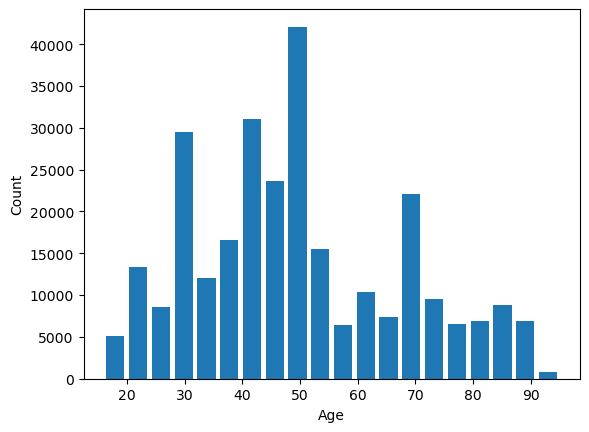

In [67]:
# Plot Histogram

plt.hist(Auto_Claim_bk06.Age, bins=20, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

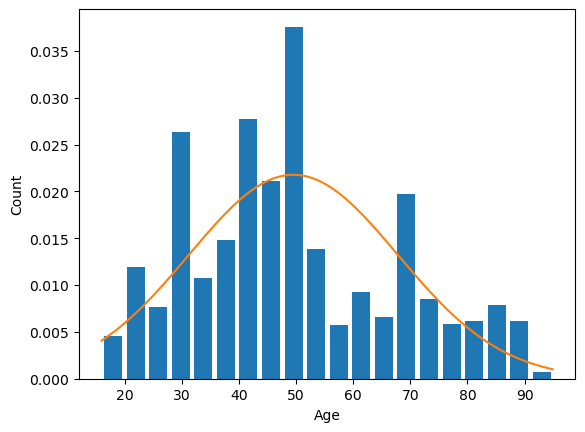

In [68]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk06.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk06.Age.min(),Auto_Claim_bk06.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk06.Age.mean(),Auto_Claim_bk06.Age.std()))

In [69]:
# Eliminate the outlier in 'Age' and write data to new file

In [70]:
# Calculate upper limit
Age_UL = round(Auto_Claim_bk06.Age.mean() + 3 * Auto_Claim_bk06.Age.std(),3)
Age_UL

104.473

In [71]:
# Calculate Lower limit
Age_LL = round(Auto_Claim_bk06.Age.mean() - 3 * Auto_Claim_bk06.Age.std(),3)
Age_LL

-5.397

In [72]:
# Display the outlier in the dataset

Auto_Claim_bk06[(Auto_Claim_bk06.Age > Age_UL) & (Auto_Claim_bk06.Age > Age_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [73]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk07 = Auto_Claim_bk06[(Auto_Claim_bk06.Age > Age_LL) & (Auto_Claim_bk06.Age <Age_UL)]
Auto_Claim_bk07.shape

(283404, 29)

In [74]:
#Claim_Paid_Out

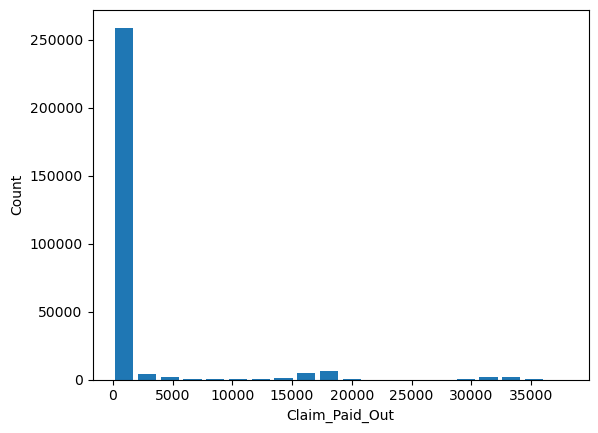

In [75]:
# Plot Histogram

plt.hist(Auto_Claim_bk07.Claim_Paid_Out, bins=20, rwidth=0.8)
plt.xlabel('Claim_Paid_Out')
plt.ylabel('Count')
plt.show()

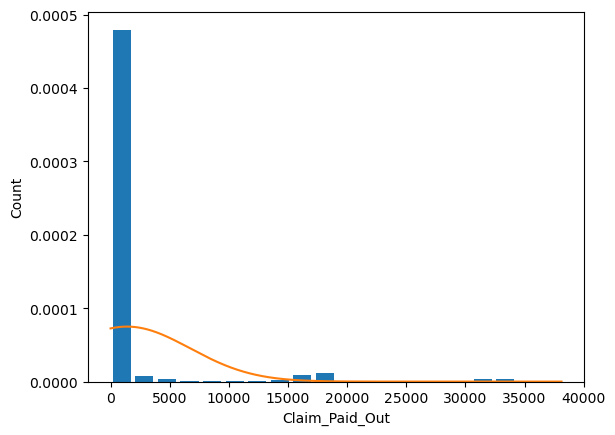

In [76]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk07.Claim_Paid_Out, bins=20, rwidth=0.8, density=True)
plt.xlabel('Claim_Paid_Out')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk07.Claim_Paid_Out.min(),Auto_Claim_bk07.Claim_Paid_Out.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk07.Claim_Paid_Out.mean(),Auto_Claim_bk07.Claim_Paid_Out.std()))

In [77]:
# Eliminate the outlier in 'Claim_Paid_Out' and write data to new file

In [78]:
# Calculate upper limit
Claim_Paid_Out_UL = round(Auto_Claim_bk07.Claim_Paid_Out.mean() + 3 * Auto_Claim_bk07.Claim_Paid_Out.std(),3)
Claim_Paid_Out_UL

17354.808

In [79]:
# Calculate Lower limit
Claim_Paid_Out_LL = round(Auto_Claim_bk07.Claim_Paid_Out.mean() - 3 * Auto_Claim_bk07.Claim_Paid_Out.std(),3)
Claim_Paid_Out_LL

-14586.353

In [80]:
# Display the outlier in the dataset

Auto_Claim_bk07[(Auto_Claim_bk07.Claim_Paid_Out > Claim_Paid_Out_UL) & (Auto_Claim_bk07.Claim_Paid_Out > Claim_Paid_Out_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
1,4/8/2018,BI-158124192,Car,1587.37,EA,OR,29,Female,Married,Masters,ITENGINEER,18,Pleasure,10875,1,0,Basic,CL000026353,Yes,3/22/2018,Yes,No,No,18623.00,BMW,23710.32,Rural,Major,Yes
37,12/17/2017,ZK-134785420,Van,1797.54,EA,NV,40,Male,Single,High School,driver,17,Pleasure,11725,1,1,Balanced,CL000027612,No,4/11/2016,Yes,Yes,Yes,18831.12,Datsun,72437.88,Semi Urban,Major,Yes
84,1/25/2020,PD-167562758,Truck,1726.14,EA,CA,42,Female,Single,Masters,Engineer,19,Commute,18238,1,1,Balanced,CL000028836,No,7/9/2018,Yes,No,Yes,33899.06,Nissan,36255.70,Semi Urban,Major,Yes
143,10/16/2013,ZZ-138299232,Car,1653.05,EA,OR,20,Male,Single,High School,Student,2,Pleasure,11354,1,1,Basic,CL000001696,Yes,5/28/2019,Yes,No,No,19128.27,BMW,22885.36,Urban,Fatal,Yes
153,8/3/2015,CV-128502490,Car,1835.20,IA,AZ,87,Male,Single,High School,Student,71,Pleasure,17037,1,1,Balanced,CL000029462,No,4/28/2017,Yes,Yes,Yes,33777.70,Datsun,23931.39,Country side,Fatal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284963,10/16/2018,AW-160550029,Car,1469.28,EA,OR,50,Male,Married,Bachelors,Engineer,15,Pleasure,33040,1,1,Balanced,CL000010183,Yes,6/6/2018,Yes,No,No,18147.68,BMW,23337.92,Semi Urban,Major,Yes
284977,5/26/2016,YJ-160524424,Car,1444.63,EA,CA,29,Female,Single,Bachelors,Engineer,3,Pleasure,27415,1,1,Balanced,CL000019235,No,10/20/2018,Yes,No,No,18536.59,Nissan,23845.36,Country side,Minor,Yes
285049,4/23/2014,SV-182645089,Car,1721.38,IA,CA,30,Male,Single,High School,Student,20,Pleasure,16914,0,1,Balanced,CL000007775,No,11/8/2015,Yes,Yes,Yes,31160.18,Honda,32866.17,Urban,Major,Yes
285051,3/28/2012,PY-150977008,Car,2034.81,IA,CA,20,Male,Single,High School,Student,5,Pleasure,18051,1,1,Balanced,CL000008192,No,5/13/2019,Yes,Yes,Yes,34632.82,Datsun,23559.74,Semi Urban,Minor,Yes


In [81]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk08 = Auto_Claim_bk07[(Auto_Claim_bk07.Claim_Paid_Out > Claim_Paid_Out_LL) & (Auto_Claim_bk07.Claim_Paid_Out < Claim_Paid_Out_UL)]
Auto_Claim_bk08.shape

(272905, 29)

In [82]:
#Vehicle_Cost

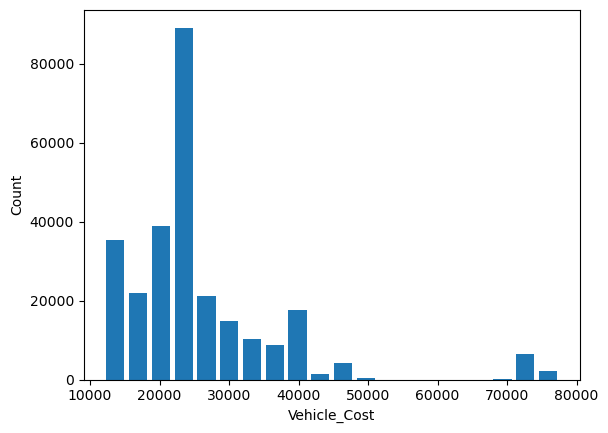

In [83]:
# Plot Histogram

plt.hist(Auto_Claim_bk08.Vehicle_Cost, bins=20, rwidth=0.8)
plt.xlabel('Vehicle_Cost')
plt.ylabel('Count')
plt.show()

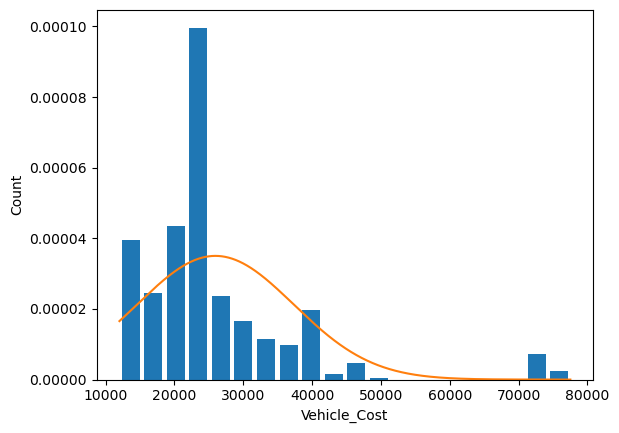

In [84]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk08.Vehicle_Cost, bins=20, rwidth=0.8, density=True)
plt.xlabel('Vehicle_Cost')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk08.Vehicle_Cost.min(),Auto_Claim_bk08.Vehicle_Cost.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk08.Vehicle_Cost.mean(),Auto_Claim_bk08.Vehicle_Cost.std()))

In [85]:
# Eliminate the outlier in 'Vehicle_Cost' and write data to new file

In [86]:
# Calculate upper limit
Vehicle_Cost_UL = round(Auto_Claim_bk08.Vehicle_Cost.mean() + 3 * Auto_Claim_bk08.Vehicle_Cost.std(),3)
Vehicle_Cost_UL

60108.493

In [87]:
# Calculate Lower limit
Vehicle_Cost_LL = round(Auto_Claim_bk08.Vehicle_Cost.mean() - 3 * Auto_Claim_bk08.Vehicle_Cost.std(),3)
Vehicle_Cost_LL

-8219.299

In [88]:
# Display the outlier in the dataset

Auto_Claim_bk08[(Auto_Claim_bk08.Vehicle_Cost >Vehicle_Cost_UL) & (Auto_Claim_bk08.Vehicle_Cost > Vehicle_Cost_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
14,6/4/2019,JQ-180674493,Van,1201.31,EA,CA,38,Female,Married,High School,driver,22,Pleasure,23599,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Hyundai,72748.62,Semi Urban,Major,No
22,1/14/2017,GH-139511471,Truck,1404.01,IA,NV,37,Female,Single,Bachelors,Architect,9,Pleasure,23712,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,14.28,GM,75136.23,Semi Urban,Major,No
46,7/5/2017,FB-195017518,Truck,1379.87,IA,NV,47,Male,Married,High School,Carpenter,29,Pleasure,16114,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Dodge,75017.11,Semi Urban,Major,No
52,9/5/2016,HY-187724346,Van,1568.75,EA,OR,39,Male,Married,PhD,CEO,19,Pleasure,16361,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Lincoln,73963.94,Semi Urban,Major,No
80,2/28/2017,ZG-182671956,Van,1899.32,EA,NV,39,Female,Married,High School,driver,14,Pleasure,11269,0,1,Basic,CL000005818,Yes,10/24/2015,Yes,No,Yes,12990.74,BMW,73793.38,Country side,Major,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284966,1/21/2016,RX-147294712,Car,1794.64,IA,AZ,82,Female,Married,PhD,Engineer,49,Pleasure,23429,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Ford,73943.26,Semi Urban,Major,No
284970,7/12/2018,FE-196906433,Truck,1569.90,IA,CA,27,Female,Single,Bachelors,ITENGINEER,13,Pleasure,14290,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Chevrolet,72917.45,Semi Urban,Major,No
284975,1/10/2012,JI-151961185,Truck,1703.35,EA,CA,43,Female,Married,Masters,Engineer,14,Pleasure,16739,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,GM,73424.90,Semi Urban,Major,No
284980,6/7/2016,HQ-144151466,Car,1725.53,IA,OR,55,Female,Married,Masters,Engineer,38,Pleasure,16816,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,Ferrari,72684.49,Semi Urban,Major,No


In [89]:
# Eliminate the outlier and write data to new file

Auto_Claim_new = Auto_Claim_bk08[(Auto_Claim_bk08.Vehicle_Cost > Vehicle_Cost_LL) & (Auto_Claim_bk08.Vehicle_Cost <Vehicle_Cost_UL)]
Auto_Claim_new.shape

(264339, 29)

In [90]:
#STEP-4:CATEGORICAL DATA AND ENCODING TECHNIQUES

In [91]:
Auto_Claim_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264339 entries, 0 to 285129
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Inception_Date      264339 non-null  object 
 1   Policy_Number       264339 non-null  object 
 2   Policy_Type         264339 non-null  object 
 3   Policy_Premium      264339 non-null  float64
 4   Channel             264339 non-null  object 
 5   State               264339 non-null  object 
 6   Age                 264339 non-null  int64  
 7   Gender              264339 non-null  object 
 8   Marital_Status      264339 non-null  object 
 9   Education           264339 non-null  object 
 10  Profession          264339 non-null  object 
 11  Driving_Exp         264339 non-null  int64  
 12  Vehicle_Usage       264339 non-null  object 
 13  Annual_Miles        264339 non-null  int64  
 14  Previous_Citations  264339 non-null  int64  
 15  Prevous_Accidents   264339 non-nul

In [92]:
# Display unique values counts for each variable

Auto_Claim_new.nunique()

Inception_Date          2781
Policy_Number          26292
Policy_Type                3
Policy_Premium         66517
Channel                    2
State                      4
Age                       80
Gender                     2
Marital_Status             4
Education                  4
Profession                17
Driving_Exp               75
Vehicle_Usage              3
Annual_Miles           27216
Previous_Citations         2
Prevous_Accidents          3
Coverage_Type              3
Claim_Number            2790
Umbrella_Policy            2
Accident_Date           1561
Police_File                2
Any_Eye_Witness            2
Hired_Attorney             2
Claim_Paid_Out         17287
Make                      24
Vehicle_Cost          239742
Road_Type                  4
Accident_Severity          3
Claimed                    2
dtype: int64

In [93]:
# Display the data by variables wise

for i in Auto_Claim_new.columns:
    print(Auto_Claim_new[i].value_counts())

4/4/2017      691
12/27/2016    413
4/13/2017     410
7/5/2017      406
7/5/2016      405
             ... 
3/13/2013       1
4/27/2013       1
2/14/2011       1
7/2/2013        1
10/6/2012       1
Name: Inception_Date, Length: 2781, dtype: int64
AZ-178535846    130
GF-181689399    116
AQ-198523899    106
QR-144419327    103
CA-127708890    102
               ... 
TI-192031195      1
EM-182317683      1
GF-137738781      1
OC-131759234      1
EM-184825021      1
Name: Policy_Number, Length: 26292, dtype: int64
Car      174067
Truck     45247
Van       45025
Name: Policy_Type, dtype: int64
1597.59    21
1606.85    20
1589.81    20
1579.33    20
1587.09    19
           ..
1809.99     1
2006.36     1
1789.23     1
1333.73     1
1916.99     1
Name: Policy_Premium, Length: 66517, dtype: int64
EA    154617
IA    109722
Name: Channel, dtype: int64
CA    112762
OR     56324
AZ     49200
NV     46053
Name: State, dtype: int64
51    17117
50    11844
52     8458
41     7884
40     7679
      ..

In [94]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,11/4/2019,VJ-130653912,Van,1176.40,EA,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,8/3/2015,DZ-175413016,Car,1268.38,IA,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,6/8/2015,QX-179005448,Car,1921.00,IA,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,1/4/2018,KM-194622292,Car,1582.98,EA,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,1/1/2017,GD-196560923,Van,1548.93,EA,CA,33,Male,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [95]:
# Identify the numerical and categorical variables

num_vars = Auto_Claim_new.columns[Auto_Claim_new.dtypes != 'object']
cat_vars = Auto_Claim_new.columns[Auto_Claim_new.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Policy_Premium', 'Age', 'Driving_Exp', 'Annual_Miles',
       'Previous_Citations', 'Prevous_Accidents', 'Claim_Paid_Out',
       'Vehicle_Cost'],
      dtype='object')
Index(['Inception_Date', 'Policy_Number', 'Policy_Type', 'Channel', 'State',
       'Gender', 'Marital_Status', 'Education', 'Profession', 'Vehicle_Usage',
       'Coverage_Type', 'Claim_Number', 'Umbrella_Policy', 'Accident_Date',
       'Police_File', 'Any_Eye_Witness', 'Hired_Attorney', 'Make', 'Road_Type',
       'Accident_Severity', 'Claimed'],
      dtype='object')


In [96]:
# Display 'Inception_Date' categorical variable 

Auto_Claim_new['Inception_Date'].value_counts()

4/4/2017      691
12/27/2016    413
4/13/2017     410
7/5/2017      406
7/5/2016      405
             ... 
3/13/2013       1
4/27/2013       1
2/14/2011       1
7/2/2013        1
10/6/2012       1
Name: Inception_Date, Length: 2781, dtype: int64

In [97]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Inception_Date'] = LE.fit_transform(Auto_Claim_new[['Inception_Date']])

In [98]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,VJ-130653912,Van,1176.40,EA,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,DZ-175413016,Car,1268.38,IA,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,QX-179005448,Car,1921.00,IA,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,KM-194622292,Car,1582.98,EA,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,GD-196560923,Van,1548.93,EA,CA,33,Male,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [99]:
# Display 'Inception_Date' categorical variable 

Auto_Claim_new['Inception_Date'].value_counts()

1602    691
888     413
1454    410
2292    406
2291    405
       ... 
1218      1
1563      1
1018      1
2186      1
459       1
Name: Inception_Date, Length: 2781, dtype: int64

In [100]:
#Policy_Number

In [101]:
# Display 'Policy_Number' categorical variable 

Auto_Claim_new['Policy_Number'].value_counts()

AZ-178535846    130
GF-181689399    116
AQ-198523899    106
QR-144419327    103
CA-127708890    102
               ... 
TI-192031195      1
EM-182317683      1
GF-137738781      1
OC-131759234      1
EM-184825021      1
Name: Policy_Number, Length: 26292, dtype: int64

In [102]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Policy_Number'] = LE.fit_transform(Auto_Claim_new[['Policy_Number']])

In [103]:
# Display 'Policy_Number' categorical variable 

Auto_Claim_new['Policy_Number'].value_counts()

1001     130
6273     116
655      106
16899    103
2057     102
        ... 
19523      1
4608       1
6255       1
14264      1
4610       1
Name: Policy_Number, Length: 26292, dtype: int64

In [104]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,Van,1176.40,EA,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,Car,1268.38,IA,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,Car,1921.00,IA,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,Car,1582.98,EA,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,Van,1548.93,EA,CA,33,Male,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [105]:
#Policy_Type

In [106]:
# Display 'Policy_Type' categorical variable 

Auto_Claim_new['Policy_Type'].value_counts()

Car      174067
Truck     45247
Van       45025
Name: Policy_Type, dtype: int64

In [107]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Policy_Type'] = LE.fit_transform(Auto_Claim_new[['Policy_Type']])

In [108]:
# Display 'Policy_Type' categorical variable 

Auto_Claim_new['Policy_Type'].value_counts()

0    174067
1     45247
2     45025
Name: Policy_Type, dtype: int64

In [109]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,EA,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,IA,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,IA,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,EA,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,EA,CA,33,Male,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [110]:
#Channel

In [111]:
# Display 'Channel' categorical variable 

Auto_Claim_new['Channel'].value_counts()

EA    154617
IA    109722
Name: Channel, dtype: int64

In [112]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Channel'] = LE.fit_transform(Auto_Claim_new[['Channel']])

In [113]:
# Display 'Policy_Number' categorical variable 

Auto_Claim_new['Channel'].value_counts()

0    154617
1    109722
Name: Channel, dtype: int64

In [114]:
#State    

In [115]:
# Display 'State' categorical variable 

Auto_Claim_new['State'].value_counts()

CA    112762
OR     56324
AZ     49200
NV     46053
Name: State, dtype: int64

In [116]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['State'] = LE.fit_transform(Auto_Claim_new[['State']])

In [117]:
# Display 'State' categorical variable 

Auto_Claim_new['State'].value_counts()

1    112762
3     56324
0     49200
2     46053
Name: State, dtype: int64

In [118]:
#Gender

In [119]:
# Display 'Gender' categorical variable 

Auto_Claim_new['Gender'].value_counts()

Male      167359
Female     96980
Name: Gender, dtype: int64

In [120]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Gender'] = LE.fit_transform(Auto_Claim_new[['Gender']])

In [121]:
# Display 'Gender' categorical variable 

Auto_Claim_new['Gender'].value_counts()

1    167359
0     96980
Name: Gender, dtype: int64

In [122]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [123]:
#Marital_Status

In [124]:
# Display 'Marital_Status' categorical variable 

Auto_Claim_new['Marital_Status'].value_counts()

Married     186927
Single       60713
Divorced     10464
Widow         6235
Name: Marital_Status, dtype: int64

In [125]:
# Replace variable 'Marital_Status', and convert the 'Marital_Status' to integer value.

Auto_Claim_new['Marital_Status'] = Auto_Claim_new['Marital_Status'].str.replace('Single', '1')
Auto_Claim_new['Marital_Status'] = Auto_Claim_new['Marital_Status'].str.replace('Married', '4')
Auto_Claim_new['Marital_Status'] = Auto_Claim_new['Marital_Status'].str.replace('Divorced', '2')
Auto_Claim_new['Marital_Status'] = Auto_Claim_new['Marital_Status'].str.replace('Widow', '3')
Auto_Claim_new['Marital_Status'] = Auto_Claim_new['Marital_Status'].astype(int)

In [126]:
# Display 'Marital_Status' categorical variable 

Auto_Claim_new['Marital_Status'].value_counts()

4    186927
1     60713
2     10464
3      6235
Name: Marital_Status, dtype: int64

In [127]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [128]:
#Education

In [129]:
# Display 'Education' categorical variable 

Auto_Claim_new['Education'].value_counts()

High School    96792
Bachelors      67640
Masters        64411
PhD            35496
Name: Education, dtype: int64

In [130]:
# Replace the variable 'education', convert the 'education' to integer value.

Auto_Claim_new['Education'] = Auto_Claim_new['Education'].str.replace('High School', '1')
Auto_Claim_new['Education'] = Auto_Claim_new['Education'].str.replace('Bachelors', '2')
Auto_Claim_new['Education'] = Auto_Claim_new['Education'].str.replace('Masters', '3')
Auto_Claim_new['Education'] = Auto_Claim_new['Education'].str.replace('PhD', '4')
Auto_Claim_new['Education'] = Auto_Claim_new['Education'].astype(int)

In [131]:
# Display 'Education' categorical variable 

Auto_Claim_new['Education'].value_counts()

1    96792
2    67640
3    64411
4    35496
Name: Education, dtype: int64

In [132]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [133]:
#Profession

In [134]:
# Display 'Profession' categorical variable 

Auto_Claim_new['Profession'].value_counts()

Engineer      81135
Carpenter     39604
ITENGINEER    17392
Student       15687
Manager       15608
Arts          13742
CEO           10944
Architect     10396
Worker        10267
driver         9582
Artist         9231
painter        9123
Professor      8467
Teacher        7485
Lawyer         5019
HR              335
Lecturer        322
Name: Profession, dtype: int64

In [135]:
# Replace 'Profession' variable, and convert the 'Profession' to integer value.

Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Student', '0')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('driver', '1')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('painter', '1')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Artist', '1')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Worker', '2')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Carpenter', '2')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Teacher', '3')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Lecturer', '3')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Professor', '3')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Arts', '4')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Lawyer', '5')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Architect', '6')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Engineer', '7')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('ITENGINEER', '7')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('HR', '8')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Manager', '8')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('CEO', '9')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].astype(int)

In [136]:
# Display 'Profession' categorical variable 

Auto_Claim_new['Profession'].value_counts()

7    98527
2    49871
1    27936
3    16274
8    15943
0    15687
4    13742
9    10944
6    10396
5     5019
Name: Profession, dtype: int64

In [137]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [138]:
#Vehicle_Usage

In [139]:
# Display 'Vehicle_Usage' categorical variable 

Auto_Claim_new['Vehicle_Usage'].value_counts()

Pleasure    136733
Business     79463
Commute      48143
Name: Vehicle_Usage, dtype: int64

In [140]:
# Replace 'Vehicle_Usage' variable, and convert the 'Vehicle_Usage' to integer value.

Auto_Claim_new['Vehicle_Usage'] = Auto_Claim_new['Vehicle_Usage'].str.replace('Commute', '0')
Auto_Claim_new['Vehicle_Usage'] = Auto_Claim_new['Vehicle_Usage'].str.replace('Business', '1')
Auto_Claim_new['Vehicle_Usage'] = Auto_Claim_new['Vehicle_Usage'].str.replace('Pleasure', '2')
Auto_Claim_new['Vehicle_Usage'] = Auto_Claim_new['Vehicle_Usage'].astype(int)

In [141]:
# Display 'Vehicle_Usage' categorical variable 

Auto_Claim_new['Vehicle_Usage'].value_counts()

2    136733
1     79463
0     48143
Name: Vehicle_Usage, dtype: int64

In [142]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [143]:
#Coverage_Type

In [144]:
# Display 'Coverage_Type' categorical variable 

Auto_Claim_new['Coverage_Type'].value_counts()

Balanced    120985
Enhanced     92116
Basic        51238
Name: Coverage_Type, dtype: int64

In [145]:
# Replace 'Coverage_Type' variable, and convert the 'Coverage_Type' to integer value.

Auto_Claim_new['Coverage_Type'] = Auto_Claim_new['Coverage_Type'].str.replace('Basic', '0')
Auto_Claim_new['Coverage_Type'] = Auto_Claim_new['Coverage_Type'].str.replace('Balanced', '1')
Auto_Claim_new['Coverage_Type'] = Auto_Claim_new['Coverage_Type'].str.replace('Enhanced', '2')
Auto_Claim_new['Coverage_Type'] = Auto_Claim_new['Coverage_Type'].astype(int)

In [146]:
# Display 'Coverage_Type' categorical variable 

Auto_Claim_new['Coverage_Type'].value_counts()

1    120985
2     92116
0     51238
Name: Coverage_Type, dtype: int64

In [147]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [148]:
#Claim_Number

In [149]:
# Display 'Claim_Number' categorical variable 

Auto_Claim_new['Claim_Number'].value_counts()

CL144120603    247347
CL000028821      1454
CL121001407       668
CL000016606       503
CL000001742       406
                ...  
CL000019047         1
CL000026378         1
CL000027463         1
CL000013792         1
CL000024661         1
Name: Claim_Number, Length: 2790, dtype: int64

In [150]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Claim_Number'] = LE.fit_transform(Auto_Claim_new[['Claim_Number']])

In [151]:
# Display 'Claim_Number' categorical variable 

Auto_Claim_new['Claim_Number'].value_counts()

2789    247347
2556      1454
2726       668
1475       503
166        406
         ...  
1679         1
2326         1
2424         1
1229         1
2169         1
Name: Claim_Number, Length: 2790, dtype: int64

In [152]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [153]:
#Umbrella_Policy

In [154]:
# Display 'Umbrella_Policy' categorical variable 

Auto_Claim_new['Umbrella_Policy'].value_counts()

No     238653
Yes     25686
Name: Umbrella_Policy, dtype: int64

In [155]:
# Replace 'Umbrella_Policy' variable, and convert the 'Umbrella_Policy' to integer value.

Auto_Claim_new['Umbrella_Policy'] = Auto_Claim_new['Umbrella_Policy'].str.replace('No', '0')
Auto_Claim_new['Umbrella_Policy'] = Auto_Claim_new['Umbrella_Policy'].str.replace('Yes', '1')
Auto_Claim_new['Umbrella_Policy'] = Auto_Claim_new['Umbrella_Policy'].astype(int)

In [156]:
# Display 'Umbrella_Policy' categorical variable 

Auto_Claim_new['Umbrella_Policy'].value_counts()

0    238653
1     25686
Name: Umbrella_Policy, dtype: int64

In [157]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [158]:
#Accident_Date

In [159]:
# Display 'Accident_Date' categorical variable 

Auto_Claim_new['Accident_Date'].value_counts()

9/30/2018     124581
1/2/2019      124441
12/16/2018       476
2/11/2020        141
5/3/2019         126
               ...  
4/10/2015          1
8/8/2014           1
7/3/2017           1
8/15/2014          1
8/31/2014          1
Name: Accident_Date, Length: 1561, dtype: int64

In [160]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Accident_Date'] = LE.fit_transform(Auto_Claim_new[['Accident_Date']])

In [161]:
# Display 'Accident_Date' categorical variable 

Auto_Claim_new['Accident_Date'].value_counts()

1536    124581
53      124441
431        476
534        141
1023       126
         ...  
792          1
1427         1
1262         1
1323         1
1406         1
Name: Accident_Date, Length: 1561, dtype: int64

In [162]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [163]:
#Police_File

In [164]:
# Display 'Police_File' categorical variable 

Auto_Claim_new['Police_File'].value_counts()

No     248877
Yes     15462
Name: Police_File, dtype: int64

In [165]:
# Replace 'Police_File' variable, and convert the 'Police_File' to integer value.

Auto_Claim_new['Police_File'] = Auto_Claim_new['Police_File'].str.replace('No', '0')
Auto_Claim_new['Police_File'] = Auto_Claim_new['Police_File'].str.replace('Yes', '1')
Auto_Claim_new['Police_File'] = Auto_Claim_new['Police_File'].astype(int)

In [166]:
# Display 'Police_File' categorical variable 

Auto_Claim_new['Police_File'].value_counts()

0    248877
1     15462
Name: Police_File, dtype: int64

In [167]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [168]:
#Any_Eye_Witness

In [169]:
# Display 'Any_Eye_Witness' categorical variable 

Auto_Claim_new['Any_Eye_Witness'].value_counts()

No     259086
Yes      5253
Name: Any_Eye_Witness, dtype: int64

In [170]:
# Replace 'Any_Eye_Witness' variable, and convert the 'Any_Eye_Witness' to integer value.

Auto_Claim_new['Any_Eye_Witness'] = Auto_Claim_new['Any_Eye_Witness'].str.replace('No', '0')
Auto_Claim_new['Any_Eye_Witness'] = Auto_Claim_new['Any_Eye_Witness'].str.replace('Yes', '1')
Auto_Claim_new['Any_Eye_Witness'] = Auto_Claim_new['Any_Eye_Witness'].astype(int)

In [171]:
# Display 'Any_Eye_Witness' categorical variable 

Auto_Claim_new['Any_Eye_Witness'].value_counts()

0    259086
1      5253
Name: Any_Eye_Witness, dtype: int64

In [172]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [173]:
#Hired_Attorney

In [174]:
# Display 'Hired_Attorney' categorical variable 

Auto_Claim_new['Hired_Attorney'].value_counts()

No     253368
Yes     10971
Name: Hired_Attorney, dtype: int64

In [175]:
# Replace 'Hired_Attorney' variable, and convert the 'Hired_Attorney' to integer value.

Auto_Claim_new['Hired_Attorney'] = Auto_Claim_new['Hired_Attorney'].str.replace('No', '0')
Auto_Claim_new['Hired_Attorney'] = Auto_Claim_new['Hired_Attorney'].str.replace('Yes', '1')
Auto_Claim_new['Hired_Attorney'] = Auto_Claim_new['Hired_Attorney'].astype(int)

In [176]:
# Display 'Hired_Attorney' categorical variable 

Auto_Claim_new['Hired_Attorney'].value_counts()

0    253368
1     10971
Name: Hired_Attorney, dtype: int64

In [177]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,Honda,25434.74,Semi Urban,Major,No


In [178]:
#Make

In [179]:
# Display 'Make' categorical variable 

Auto_Claim_new['Make'].value_counts()

Chevrolet      40294
Honda          30729
Hyundai        23595
Ford           22579
GM             15960
Dodge          14769
Lincoln        13613
Volvo          12818
Chrysler       10996
Toyota         10149
Mercedes       10079
Cadillac        9788
Bugatti         8627
Nissan          8207
Datsun          8039
Ferrari         7149
BMW             5262
Kia             4700
Lamborghini     3527
Alpha Romeo     1729
Audi             753
Bentley          554
Isuzu            388
Skoda             35
Name: Make, dtype: int64

In [180]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Make'] = LE.fit_transform(Auto_Claim_new[['Make']])

In [181]:
# Display 'Make' categorical variable 

Auto_Claim_new['Make'].value_counts()

6     40294
13    30729
14    23595
11    22579
12    15960
9     14769
18    13613
23    12818
7     10996
22    10149
19    10079
5      9788
4      8627
20     8207
8      8039
10     7149
2      5262
16     4700
17     3527
0      1729
1       753
3       554
15      388
21       35
Name: Make, dtype: int64

In [182]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,Semi Urban,Major,No


In [183]:
#Road_Type

In [184]:
# Display 'Road_Type' categorical variable 

Auto_Claim_new['Road_Type'].value_counts()

Semi Urban      252794
Urban             4254
Rural             3846
Country side      3445
Name: Road_Type, dtype: int64

In [185]:
# Replace 'Road_Type' variable, and convert the 'Road_Type' to integer value.

Auto_Claim_new['Road_Type'] = Auto_Claim_new['Road_Type'].str.replace('Rural', '0')
Auto_Claim_new['Road_Type'] = Auto_Claim_new['Road_Type'].str.replace('Country side', '1')
Auto_Claim_new['Road_Type'] = Auto_Claim_new['Road_Type'].str.replace('Semi Urban', '2')
Auto_Claim_new['Road_Type'] = Auto_Claim_new['Road_Type'].str.replace('Urban', '3')
Auto_Claim_new['Road_Type'] = Auto_Claim_new['Road_Type'].astype(int)

In [186]:
# Display 'Road_Type' categorical variable 

Auto_Claim_new['Road_Type'].value_counts()

2    252794
3      4254
0      3846
1      3445
Name: Road_Type, dtype: int64

In [187]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,2,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,2,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,2,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,2,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,2,Major,No


In [188]:
#Accident_Severity

In [189]:
# Display 'Accident_Severity' categorical variable 

Auto_Claim_new['Accident_Severity'].value_counts()

Major    255440
Minor      5052
Fatal      3847
Name: Accident_Severity, dtype: int64

In [190]:
# Replace 'Accident_Severity' variable, and convert the 'Accident_Severity' to integer value.

Auto_Claim_new['Accident_Severity'] = Auto_Claim_new['Accident_Severity'].str.replace('Minor', '0')
Auto_Claim_new['Accident_Severity'] = Auto_Claim_new['Accident_Severity'].str.replace('Major', '1')
Auto_Claim_new['Accident_Severity'] = Auto_Claim_new['Accident_Severity'].str.replace('Fatal', '2')
Auto_Claim_new['Accident_Severity'] = Auto_Claim_new['Accident_Severity'].astype(int)

In [191]:
# Display 'Accident_Severity' categorical variable 

Auto_Claim_new['Accident_Severity'].value_counts()

1    255440
0      5052
2      3847
Name: Accident_Severity, dtype: int64

In [192]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,2,1,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,2,1,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,2,1,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,2,1,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,2,1,No


In [193]:
#Claimed

In [194]:
# Display 'Claimed' categorical variable 

Auto_Claim_new['Claimed'].value_counts()

No     246104
Yes     18235
Name: Claimed, dtype: int64

In [195]:
# Replace 'Claimed' variable, and convert the 'Claimed' to integer value.

Auto_Claim_new['Claimed'] = Auto_Claim_new['Claimed'].str.replace('No', '0')
Auto_Claim_new['Claimed'] = Auto_Claim_new['Claimed'].str.replace('Yes', '1')
Auto_Claim_new['Claimed'] = Auto_Claim_new['Claimed'].astype(int)

In [196]:
# Display 'Claimed' categorical variable 

Auto_Claim_new['Claimed'].value_counts()

0    246104
1     18235
Name: Claimed, dtype: int64

In [197]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,2,1,0
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,2,1,0
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,2,1,0
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,2,1,0
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,2,1,0


In [198]:
Auto_Claim_new_count =Auto_Claim_new.Claimed.value_counts()
print('Class 0:', Auto_Claim_new_count[0])
print('Class 1:', Auto_Claim_new_count[1])
print('Proportion:', round(Auto_Claim_new_count[0] /Auto_Claim_new_count[1], 2), ': 1')
print('Total Responses:', len(Auto_Claim_new))


Class 0: 246104
Class 1: 18235
Proportion: 13.5 : 1
Total Responses: 264339


In [199]:
#unbalanced data set we need to perform over sampling

In [200]:
#STEP-5:SELECTION OF DEPENDENT AND INDEPENDENT VARIABLES

In [201]:
# Identify the Independent and Target variables

IndepVar = []
for col in Auto_Claim_new.columns:
    if col != 'Claimed':
        IndepVar.append(col)

TargetVar = 'Claimed'

x = Auto_Claim_new[IndepVar]
y = Auto_Claim_new[TargetVar]

In [202]:
# Random undersampling can be implemented using the RandomUnderSampler class

from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.10)

# fit and apply the transform
x_over, y_over = undersample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(200585, 28)
(200585,)


In [203]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140409, 28), (60176, 28), (140409,), (60176,))

In [204]:
#STEP-6:FEATURE SCALING

In [205]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [206]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,2,1,0
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,2,1,0
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,2,1,0
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,2,1,0
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,2,1,0


In [207]:
Auto_Claim_new.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_un_sampling\\autoclaimnew.xlsx")

In [208]:
# Load the Results dataset

CSResults = pd.read_csv(r"C:\Users\sriha\Data Science\CAPSTONE PROJECT\SR_20B91A04J11\CSResults.csv", header=0)

CSResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [209]:
#ALGORITHAMS

In [210]:
#1ST-ALGORITHM

Confusion matrix : 
 [[ 4840   661]
 [   56 54619]]
Outcome values : 
 4840 661 56 54619
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.88      0.93      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.94      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.8 %
Precision : 98.9 %
Recall : 88.0 %
F1 Score : 0.931
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.0 %
MCC : 0.926
roc_auc_score: 0.939


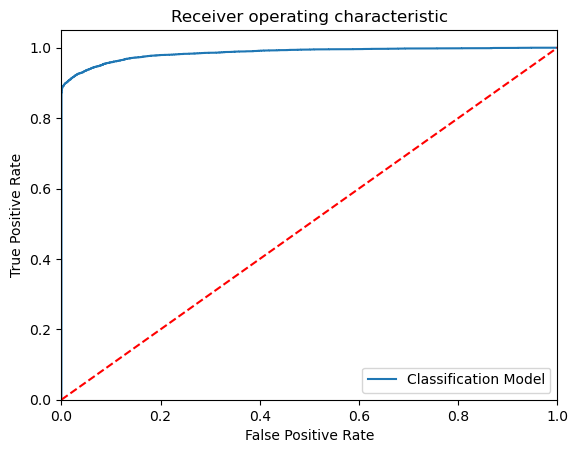

-----------------------------------------------------------------------------------------------------


In [211]:
#LOGISTIC REGRESSION:

# To build the decision tree model with random sampling

from sklearn.linear_model import LogisticRegression 

# Create an object for LR model

ModelLR = LogisticRegression()

# Train the model with training data

ModelLR = ModelLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
 #----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' :ModelLR ,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)

In [212]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),4840,661,56,54619,0.988,0.989,0.88,0.931,0.999,MCC,0.939408,0.94


In [213]:
# Predict the values with LogisticRegression algorithm

y_predF = ModelLR.predict(x_test)

In [214]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
173363,9/13/2017,VZ-175541665,Car,1380.56,EA,AZ,27,Female,Married,Bachelors,ITENGINEER,60,Business,28511,0,1,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Toyota,40160.37,Semi Urban,Major,No,0,0
45366,2/9/2015,VG-194974851,Car,1529.94,EA,CA,51,Female,Married,Masters,Engineer,35,Pleasure,16245,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,3.44,GM,17763.26,Semi Urban,Major,No,0,0
100692,3/9/2016,RO-158634085,Car,1421.10,IA,CA,29,Male,Single,High School,Student,3,Pleasure,16240,1,1,Balanced,CL000011114,No,10/21/2014,Yes,Yes,Yes,32208.71,Datsun,17184.64,Semi Urban,Major,Yes,0,0
189966,2/20/2016,VG-146958687,Van,1653.38,IA,NV,22,Male,Single,High School,Student,1,Pleasure,16644,0,0,Balanced,CL000010540,Yes,3/12/2019,Yes,Yes,No,31868.92,Dodge,24295.23,Rural,Minor,Yes,1,1
44370,5/31/2014,XB-197438519,Truck,1412.41,EA,CA,50,Female,Married,Bachelors,ITENGINEER,30,Pleasure,23513,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,17.36,Nissan,22703.94,Semi Urban,Major,No,0,0


In [215]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [216]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
47765,12/5/2015,DV-144544106,Car,1338.74,EA,CA,51,Female,Married,Masters,driver,36,Pleasure,28413,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,28.02,Ferrari,23857.07,Semi Urban,Major,No,0,0,NaN
46276,3/14/2015,EK-191171797,Car,1686.85,IA,OR,72,Male,Married,High School,driver,22,Pleasure,14166,0,0,Basic,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,23416.47,Semi Urban,Major,No,0,0,NaN
100197,5/13/2014,NS-136047958,Car,1754.80,EA,AZ,63,Female,Married,Bachelors,Architect,50,Business,27003,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Toyota,20231.88,Semi Urban,Major,No,0,0,NaN
107810,8/3/2014,LY-191784958,Truck,1667.72,EA,OR,45,Male,Married,Masters,Engineer,21,Business,13709,0,0,Balanced,CL144120603,No,1/2/2019,No,No,Yes,0.00,Volvo,27771.29,Semi Urban,Major,No,0,0,NaN
181083,3/6/2019,KO-172266506,Car,1739.58,EA,CA,43,Male,Married,Masters,Engineer,51,Pleasure,14230,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23858.42,Semi Urban,Major,No,0,0,NaN


In [217]:
Logistic_regression_analysis=ResultsFinal.copy()

In [218]:
#Export Data Frame to Excel
Logistic_regression_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_un_sampling\\Logistic_regression_analysis.xlsx")

In [219]:
#2ND-ALGORITHM

Confusion matrix : 
 [[ 4946   555]
 [  801 53874]]
Outcome values : 
 4946 555 801 53874
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.90      0.88      5501
           0       0.99      0.99      0.99     54675

    accuracy                           0.98     60176
   macro avg       0.93      0.94      0.93     60176
weighted avg       0.98      0.98      0.98     60176

Accuracy : 97.7 %
Precision : 86.1 %
Recall : 89.9 %
F1 Score : 0.879
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 94.2 %
MCC : 0.867
roc_auc_score: 0.942


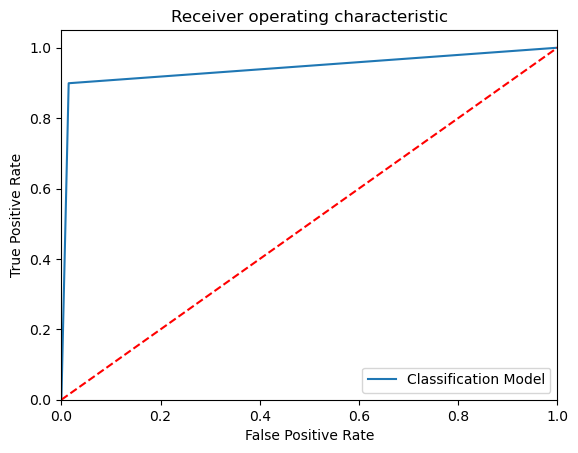

-----------------------------------------------------------------------------------------------------


In [220]:
#DECISION TREE CLASSIFIER ALGORITHAM

# To build the 'Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier 

# Create an object for model

ModelDT = DecisionTreeClassifier()
#ModelDT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
#                                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                                 class_weight=None, ccp_alpha=0.0)

# Train the model with train data 

ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
 #----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelDT,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)

In [221]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),4840,661,56,54619,0.988,0.989,0.880,0.931,0.999,MCC,0.939408,0.940
1,DecisionTreeClassifier(),4946,555,801,53874,0.977,0.861,0.899,0.879,0.985,MCC,0.942230,0.942


In [222]:
# Predict the values with DecisionTreeClassifier algorithm

y_predF = ModelDT.predict(x_test)

In [223]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
81047,9/23/2017,JG-163111726,Car,1686.01,IA,OR,44,Male,Married,High School,Student,22,Pleasure,13420,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Ford,19556.91,Semi Urban,Major,No,0,0
183713,3/15/2019,FF-191180333,Car,1444.43,IA,AZ,54,Male,Married,Masters,Engineer,50,Pleasure,25953,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,5.42,Cadillac,15003.57,Semi Urban,Major,No,1,1
33140,9/28/2017,XT-131615585,Car,1633.54,EA,OR,20,Female,Single,Bachelors,Engineer,31,Pleasure,15548,0,0,Basic,CL144120603,No,9/30/2018,No,No,No,0.00,Lincoln,22939.90,Semi Urban,Major,No,0,0
168315,4/11/2015,BK-172895717,Car,1321.42,IA,CA,44,Male,Married,Masters,Engineer,48,Pleasure,16107,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Cadillac,23085.32,Semi Urban,Major,No,0,0
69813,4/29/2018,BU-156854015,Truck,1519.46,EA,AZ,45,Male,Married,PhD,Engineer,28,Business,11807,0,1,Basic,CL144120603,Yes,9/30/2018,No,No,No,0.00,Chevrolet,33221.00,Semi Urban,Major,No,0,0


In [224]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [225]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
163967,3/5/2013,WY-140016534,Car,1663.24,IA,CA,77,Male,Married,High School,Student,67,Pleasure,13423,0,1,Basic,CL144120603,No,9/30/2018,No,No,No,0.98,Honda,24065.30,Semi Urban,Major,No,0,0,NaN
186568,1/3/2016,UV-137006070,Car,1563.46,EA,AZ,69,Male,Married,Masters,Engineer,50,Commute,13414,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,2.40,Chevrolet,24064.29,Semi Urban,Major,No,1,1,0.0
33975,4/4/2017,NE-179026667,Car,1645.26,EA,OR,78,Female,Divorced,PhD,Manager,67,Pleasure,33190,1,1,Enhanced,CL000028699,Yes,4/19/2015,Yes,No,No,17293.82,Dodge,23502.25,Rural,Fatal,Yes,0,0,NaN
194150,3/12/2017,AU-192128879,Car,1298.89,IA,AZ,40,Male,Married,Masters,Engineer,16,Commute,26889,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Ford,17835.25,Semi Urban,Major,No,1,1,0.0
145855,12/3/2019,GS-171324245,Car,1563.40,EA,OR,82,Male,Married,Masters,Engineer,45,Pleasure,13368,0,0,Basic,CL144120603,No,9/30/2018,No,No,No,0.00,Honda,23972.94,Semi Urban,Major,No,0,0,NaN


In [226]:
Decision_tree_classfier_analysis=ResultsFinal.copy()

In [227]:
#Export Data Frame to Excel
Decision_tree_classfier_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_un_sampling\\Decision_tree_classfier_analysis.xlsx")

Feature: 0, Score: 0.01277
Feature: 1, Score: 0.01343
Feature: 2, Score: 0.00147
Feature: 3, Score: 0.01579
Feature: 4, Score: 0.00122
Feature: 5, Score: 0.00155
Feature: 6, Score: 0.00723
Feature: 7, Score: 0.00147
Feature: 8, Score: 0.00202
Feature: 9, Score: 0.00211
Feature: 10, Score: 0.00237
Feature: 11, Score: 0.00771
Feature: 12, Score: 0.00239
Feature: 13, Score: 0.01456
Feature: 14, Score: 0.00299
Feature: 15, Score: 0.00190
Feature: 16, Score: 0.00164
Feature: 17, Score: 0.00524
Feature: 18, Score: 0.00102
Feature: 19, Score: 0.00206
Feature: 20, Score: 0.82784
Feature: 21, Score: 0.00050
Feature: 22, Score: 0.00047
Feature: 23, Score: 0.03441
Feature: 24, Score: 0.00504
Feature: 25, Score: 0.01496
Feature: 26, Score: 0.01265
Feature: 27, Score: 0.00318


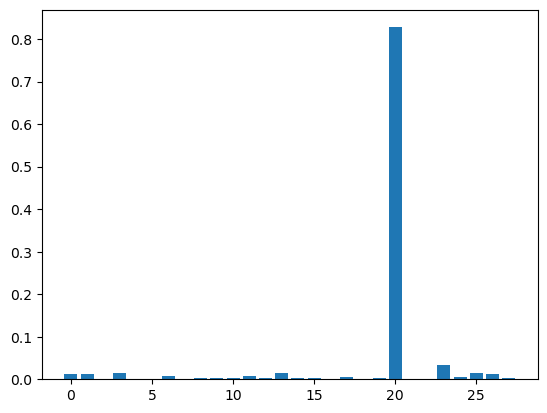

In [228]:
# To get feature importance

from matplotlib import pyplot

importance = ModelDT.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [229]:
# Results (Run upto here only)

PredResults = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = Auto_Claim_new.merge(PredResults, left_index=True, right_index=True)

# Display the 10 records randomly

TestDataResults.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P
150845,2140,9703,0,1402.97,0,3,29,1,1,2,4,3,2,14130,1,1,0,2789,0,53,0,0,0,0.0,6,23844.03,2,1,0,0,0
97918,652,995,0,1590.09,1,2,40,1,4,1,7,32,0,10009,0,0,2,2789,0,1536,0,0,0,0.0,1,14250.48,2,1,0,0,0
38083,2433,13531,0,1410.70,1,2,86,0,4,1,2,66,2,15607,0,0,2,2789,0,1536,0,0,0,0.0,5,19957.00,2,1,0,0,0
148504,35,19580,0,1479.79,0,2,57,0,4,2,6,36,1,30599,1,2,2,2789,1,53,0,0,0,0.0,19,33701.95,2,1,0,0,0
189135,1208,23655,0,1630.12,1,2,43,0,4,1,2,35,2,15715,0,0,0,2789,0,53,0,0,0,0.0,13,22907.93,2,1,0,1,1


In [230]:
#3RD-ALGORITHM

Confusion matrix : 
 [[ 4893   608]
 [   46 54629]]
Outcome values : 
 4893 608 46 54629
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.94      0.97     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.9 %
Precision : 99.1 %
Recall : 88.9 %
F1 Score : 0.937
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.4 %
MCC : 0.933
roc_auc_score: 0.944


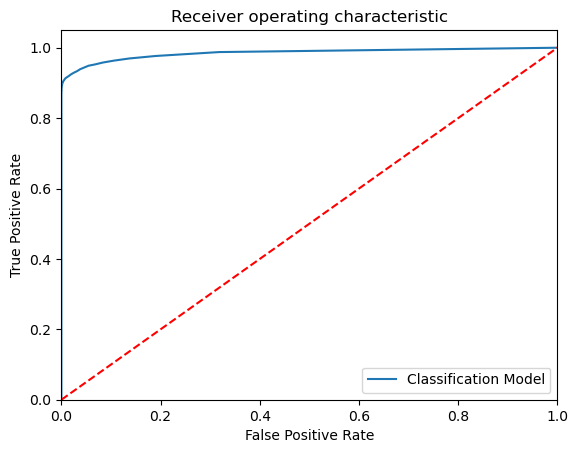

-----------------------------------------------------------------------------------------------------


In [231]:
#RANDOM FOREST:

# To build the 'Random Forest' model with random sampling

from sklearn.ensemble import RandomForestClassifier

# Create model object

ModelRF = RandomForestClassifier()
#ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
#                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
#                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
#                                 ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
 #----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)

In [232]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),4840,661,56,54619,0.988,0.989,0.880,0.931,0.999,MCC,0.939408,0.940
1,DecisionTreeClassifier(),4946,555,801,53874,0.977,0.861,0.899,0.879,0.985,MCC,0.942230,0.942
2,"(DecisionTreeClassifier(max_features='sqrt', r...",4893,608,46,54629,0.989,0.991,0.889,0.937,0.999,MCC,0.944317,0.944


In [233]:
# Predict the values with RandomForestClassifier algorithm

y_predF = ModelRF.predict(x_test)

In [234]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
18169,9/10/2015,OL-178566232,Van,1890.03,IA,NV,48,Male,Single,High School,Student,69,Pleasure,15975,1,1,Balanced,CL000016207,No,4/30/2018,Yes,Yes,Yes,31475.15,Hyundai,19037.10,Semi Urban,Major,Yes,0,0
33694,10/27/2011,KI-171089005,Car,1625.47,EA,CA,33,Female,Single,Bachelors,ITENGINEER,9,Pleasure,10579,1,1,Balanced,CL000003672,Yes,2/27/2015,Yes,No,No,11591.58,BMW,22909.74,Rural,Major,Yes,0,0
132710,8/2/2017,SW-125354277,Car,1690.38,IA,CA,29,Male,Single,High School,Student,3,Pleasure,13978,1,1,Balanced,CL000023546,No,7/13/2015,Yes,Yes,Yes,33746.44,Ford,15178.99,Semi Urban,Major,Yes,0,0
85125,5/29/2012,MK-199668040,Car,1432.02,EA,NV,52,Female,Married,PhD,Professor,34,Pleasure,16492,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,4.11,Nissan,13677.16,Semi Urban,Major,No,0,0
123266,11/30/2013,JE-125998364,Car,1527.60,EA,CA,32,Female,Single,Bachelors,ITENGINEER,35,Business,30183,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,11.55,Lincoln,24240.49,Semi Urban,Major,No,0,0


In [235]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [236]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
168103,8/25/2016,OH-159482575,Car,1810.02,EA,NV,50,Male,Divorced,PhD,Manager,69,Commute,26972,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.0,Toyota,24331.95,Semi Urban,Major,No,0,0,NaN
68889,11/24/2018,BZ-170308209,Car,1294.43,IA,CA,47,Male,Married,High School,Engineer,32,Pleasure,16153,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.0,Honda,24196.41,Semi Urban,Major,No,0,0,NaN
11636,3/12/2013,GI-165214946,Car,1603.07,EA,OR,47,Male,Married,High School,Carpenter,45,Business,27779,0,0,Basic,CL144120603,No,9/30/2018,No,No,No,0.0,Lincoln,18100.41,Semi Urban,Major,No,0,0,NaN
65114,11/13/2019,EC-136545909,Car,1731.32,EA,AZ,39,Male,Married,Masters,Lawyer,20,Pleasure,10567,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.0,Chevrolet,29602.36,Semi Urban,Major,No,0,0,NaN
113739,11/7/2019,AP-196554925,Van,1508.09,EA,CA,52,Female,Married,High School,Teacher,32,Pleasure,16174,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.0,Datsun,23668.48,Semi Urban,Major,No,0,0,NaN


In [237]:
Random_forest_classfier_analysis=ResultsFinal.copy()

In [238]:
#Export Data Frame to Excel
Random_forest_classfier_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_un_sampling\\Random_forest_classfier_analysis.xlsx")

Feature: 0, Score: 0.01225
Feature: 1, Score: 0.01217
Feature: 2, Score: 0.00298
Feature: 3, Score: 0.01334
Feature: 4, Score: 0.00163
Feature: 5, Score: 0.00300
Feature: 6, Score: 0.00971
Feature: 7, Score: 0.00160
Feature: 8, Score: 0.00277
Feature: 9, Score: 0.00290
Feature: 10, Score: 0.00412
Feature: 11, Score: 0.00876
Feature: 12, Score: 0.00319
Feature: 13, Score: 0.01402
Feature: 14, Score: 0.01423
Feature: 15, Score: 0.00841
Feature: 16, Score: 0.00268
Feature: 17, Score: 0.15003
Feature: 18, Score: 0.00705
Feature: 19, Score: 0.01606
Feature: 20, Score: 0.27979
Feature: 21, Score: 0.01849
Feature: 22, Score: 0.04242
Feature: 23, Score: 0.19880
Feature: 24, Score: 0.01115
Feature: 25, Score: 0.01266
Feature: 26, Score: 0.09488
Feature: 27, Score: 0.05090


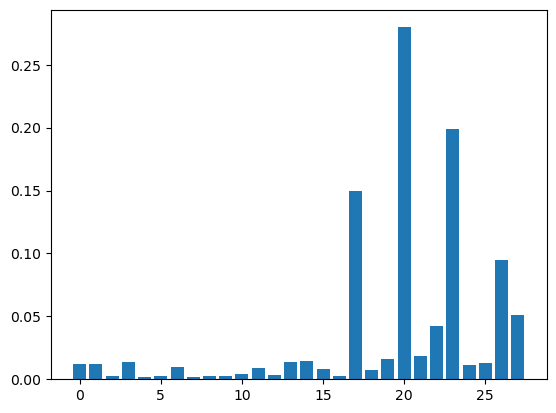

In [239]:
# To get feature importance

from matplotlib import pyplot

importance = ModelRF.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [240]:
# Results (Run upto here only)

PredResults = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = Auto_Claim_new.merge(PredResults, left_index=True, right_index=True)

# Display the 10 records randomly

TestDataResults.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P
30062,1925,21417,0,1489.33,0,2,36,0,1,3,5,13,2,16132,0,0,1,2789,0,1536,0,0,0,0.00,5,16685.22,2,1,0,0,0
101049,820,2468,0,1657.72,1,0,73,1,4,3,7,69,0,17192,0,0,2,2789,0,1536,0,0,0,0.61,6,39093.23,2,1,0,0,0
135798,658,22987,0,1195.05,1,3,86,1,1,1,0,66,2,14052,0,0,0,2789,0,1536,0,0,0,3.40,6,23835.53,2,1,0,0,0
92011,1602,9078,2,1506.57,0,0,88,1,4,3,7,60,2,14638,1,1,0,270,0,53,1,1,1,1867.10,11,23286.07,0,0,1,0,0
118534,313,19188,0,1809.18,1,0,85,0,4,4,8,65,0,14390,0,0,2,2789,0,53,0,0,0,0.00,6,13528.65,2,1,0,0,0


In [241]:
#4TH-ALGORITHM

Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 4892   609]
 [   45 54630]]
Outcome values : 
 4892 609 45 54630
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.94      0.97     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.9 %
Precision : 99.1 %
Recall : 88.9 %
F1 Score : 0.937
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.4 %
MCC : 0.933
roc_auc_score: 0.944


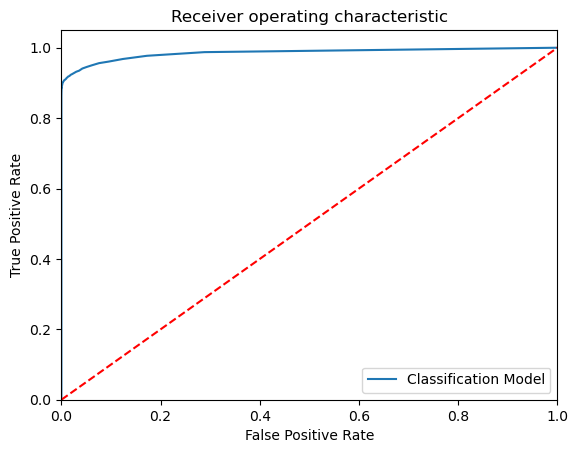

-----------------------------------------------------------------------------------------------------


In [242]:
#EXTRA TREE CLASSIFIER

# To build the 'Random Forest' model with random sampling
from sklearn.ensemble import ExtraTreesClassifier

# Create model object

ModelET = ExtraTreesClassifier()

# Evalution matrix for the algorithm

MM = [ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [243]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),4840,661,56,54619,0.988,0.989,0.880,0.931,0.999,MCC,0.939408,0.940
1,DecisionTreeClassifier(),4946,555,801,53874,0.977,0.861,0.899,0.879,0.985,MCC,0.942230,0.942
2,"(DecisionTreeClassifier(max_features='sqrt', r...",4893,608,46,54629,0.989,0.991,0.889,0.937,0.999,MCC,0.944317,0.944
3,"(ExtraTreeClassifier(random_state=1288868412),...",4892,609,45,54630,0.989,0.991,0.889,0.937,0.999,MCC,0.944235,0.944


In [244]:
# Predict the values with ExtraTreeClassifier algorithm

y_predF = ModelET.predict(x_test)

In [245]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
76160,4/7/2015,NB-142373836,Truck,1481.56,EA,AZ,46,Male,Married,PhD,CEO,61,Business,33400,1,1,Enhanced,CL144120603,No,9/30/2018,No,No,No,31.19,Mercedes,23230.43,Semi Urban,Major,No,0,0
114697,4/2/2013,RR-193825978,Car,1682.07,EA,OR,46,Male,Married,Masters,Carpenter,42,Pleasure,11900,1,1,Basic,CL000000015,Yes,12/23/2013,Yes,No,No,17635.60,BMW,23581.13,Rural,Major,Yes,0,0
41071,8/31/2014,KQ-160987994,Car,1563.54,IA,CA,76,Male,Married,High School,Carpenter,69,Commute,13934,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,Chevrolet,24230.27,Semi Urban,Major,No,0,0
115882,5/27/2015,LE-144108542,Van,1470.52,EA,CA,48,Female,Single,High School,Teacher,12,Pleasure,16000,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Datsun,13744.76,Semi Urban,Major,No,0,0
164793,1/12/2019,KV-138501340,Van,1312.98,EA,NV,65,Male,Married,Masters,Carpenter,49,Pleasure,14032,1,1,Balanced,CL144120603,No,1/2/2019,No,No,No,17.97,Bentley,28123.54,Semi Urban,Major,No,0,0


In [246]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [247]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
154280,7/1/2014,LC-141862999,Car,1585.54,EA,NV,30,Female,Single,PhD,Professor,30,Pleasure,15910,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,19.24,Honda,27495.18,Semi Urban,Major,No,0,0,NaN
40793,3/5/2016,OS-175052997,Car,1531.97,EA,CA,31,Female,Married,Masters,ITENGINEER,42,Business,13146,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Lincoln,14215.56,Semi Urban,Major,No,0,0,NaN
129646,12/21/2013,ZH-130972529,Car,1743.97,EA,OR,39,Female,Single,Bachelors,Arts,2,Business,32940,1,2,Basic,CL144120603,Yes,9/30/2018,No,No,No,16.43,Mercedes,34740.85,Semi Urban,Major,No,0,0,NaN
93163,10/27/2016,GZ-180344619,Car,1477.96,IA,OR,41,Male,Single,High School,Teacher,22,Commute,26545,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,2.14,Hyundai,20812.08,Semi Urban,Major,No,0,0,NaN
180349,8/8/2018,UP-180721104,Car,1424.43,EA,OR,46,Male,Married,High School,driver,29,Pleasure,13385,1,2,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Lincoln,40238.30,Semi Urban,Major,No,0,0,NaN


In [248]:
Extra_tree_classfier_analysis=ResultsFinal.copy()

In [249]:
#Export Data Frame to Excel
Extra_tree_classfier_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_un_sampling\\Extra_tree_classfier_analysis.xlsx")

In [250]:
#5TH-ALGORITHM

In [251]:
# Load the results dataset

KNNResults = pd.read_csv(r"C:\Users\sriha\Data Science\data by sir\day 4\session 1\KNN_Results.csv", header=0)



KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 4796   705]
 [  542 54133]]
Outcome values : 
 4796 705 542 54133
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.87      0.88      5501
           0       0.99      0.99      0.99     54675

    accuracy                           0.98     60176
   macro avg       0.94      0.93      0.94     60176
weighted avg       0.98      0.98      0.98     60176

Accuracy : 97.9 %
Precision : 89.8 %
Recall : 87.2 %
F1 Score : 0.885
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 93.1 %
MCC : 0.874
roc_auc_score: 0.931


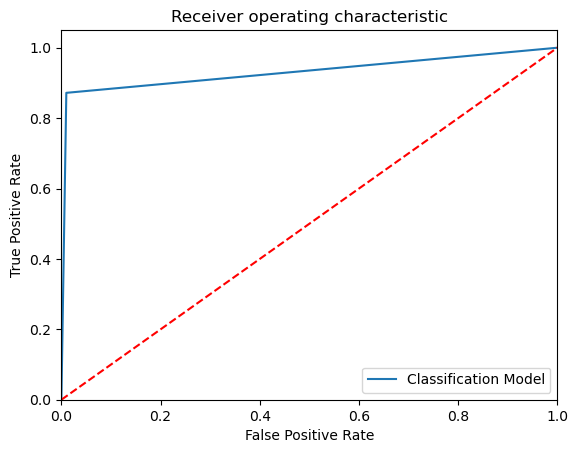

-----------------------------------------------------------------------------------------------------
KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 4695   806]
 [   31 54644]]
Outcome values : 
 4695 806 31 54644
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.85      0.92      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.93      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.6 %
Precision : 99.3 %
Recall : 85.3 %
F1 Score : 0.918
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 92.6 %
MCC : 0.914
roc_auc_score: 0.926


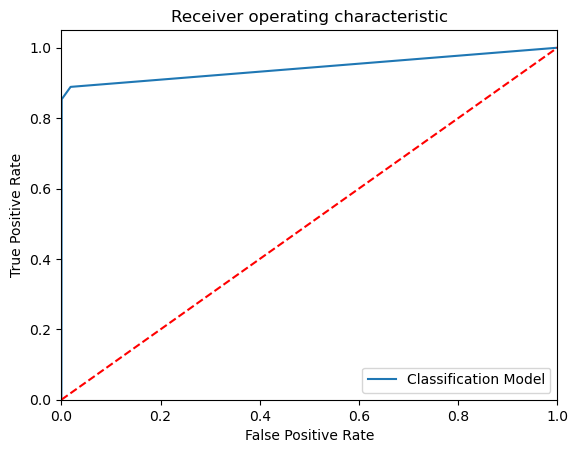

-----------------------------------------------------------------------------------------------------
KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 4755   746]
 [   88 54587]]
Outcome values : 
 4755 746 88 54587
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.86      0.92      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.98      0.93      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.6 %
Precision : 98.2 %
Recall : 86.4 %
F1 Score : 0.919
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 93.1 %
MCC : 0.914
roc_auc_score: 0.931


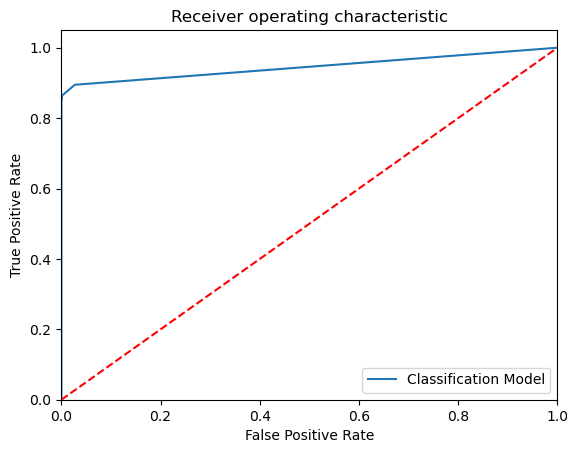

-----------------------------------------------------------------------------------------------------
KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 4719   782]
 [    6 54669]]
Outcome values : 
 4719 782 6 54669
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.93      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.7 %
Precision : 99.9 %
Recall : 85.8 %
F1 Score : 0.923
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 92.9 %
MCC : 0.919
roc_auc_score: 0.929


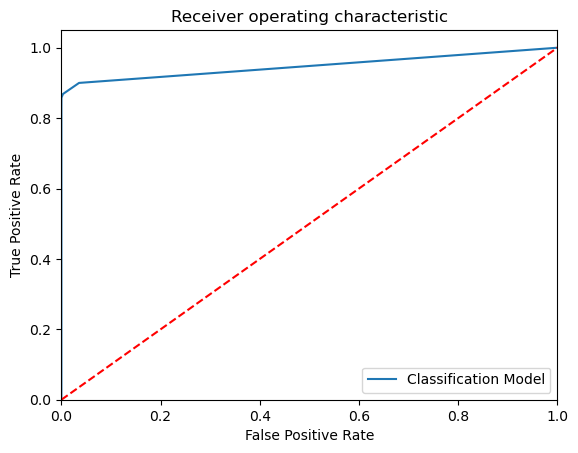

-----------------------------------------------------------------------------------------------------
KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 4735   766]
 [   34 54641]]
Outcome values : 
 4735 766 34 54641
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.86      0.92      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.93      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.7 %
Precision : 99.3 %
Recall : 86.1 %
F1 Score : 0.922
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 93.0 %
MCC : 0.918
roc_auc_score: 0.93


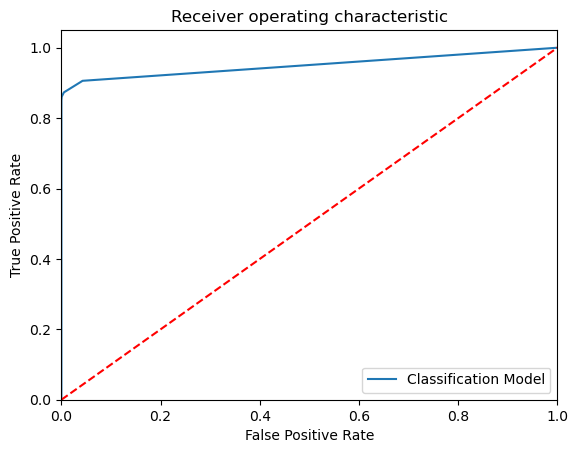

-----------------------------------------------------------------------------------------------------
KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 4702   799]
 [    6 54669]]
Outcome values : 
 4702 799 6 54669
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.85      0.92      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.93      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.7 %
Precision : 99.9 %
Recall : 85.5 %
F1 Score : 0.921
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 92.8 %
MCC : 0.917
roc_auc_score: 0.927


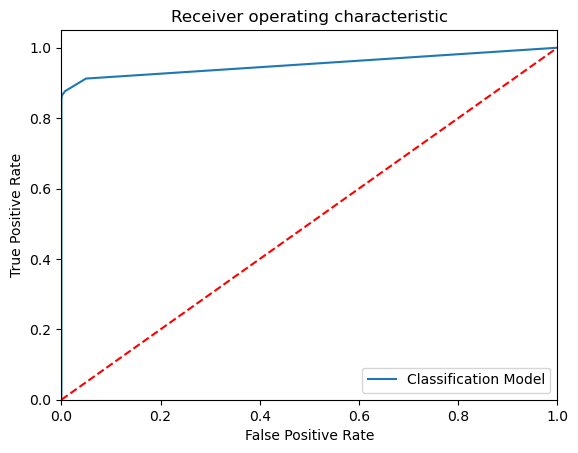

-----------------------------------------------------------------------------------------------------
KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 4718   783]
 [    9 54666]]
Outcome values : 
 4718 783 9 54666
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.93      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.7 %
Precision : 99.8 %
Recall : 85.8 %
F1 Score : 0.923
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 92.9 %
MCC : 0.919
roc_auc_score: 0.929


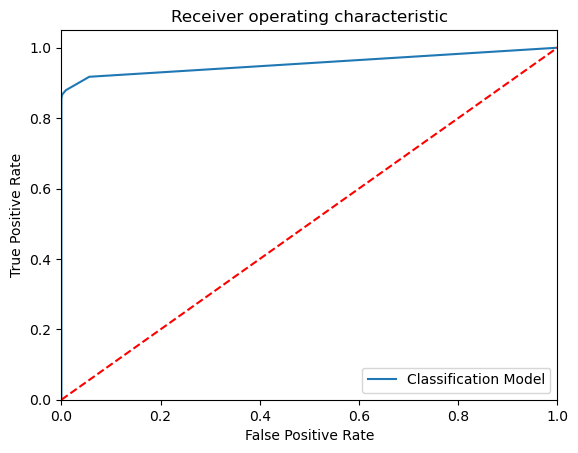

-----------------------------------------------------------------------------------------------------
KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 4697   804]
 [    5 54670]]
Outcome values : 
 4697 804 5 54670
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.85      0.92      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.93      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.7 %
Precision : 99.9 %
Recall : 85.4 %
F1 Score : 0.921
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 92.7 %
MCC : 0.917
roc_auc_score: 0.927


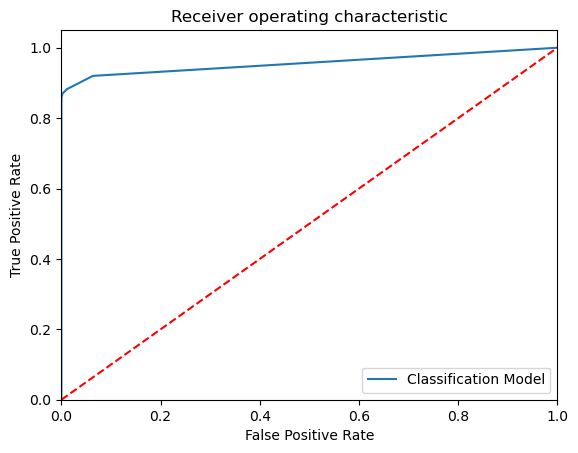

-----------------------------------------------------------------------------------------------------
KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 4706   795]
 [    8 54667]]
Outcome values : 
 4706 795 8 54667
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.93      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.7 %
Precision : 99.8 %
Recall : 85.5 %
F1 Score : 0.921
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 92.8 %
MCC : 0.917
roc_auc_score: 0.928


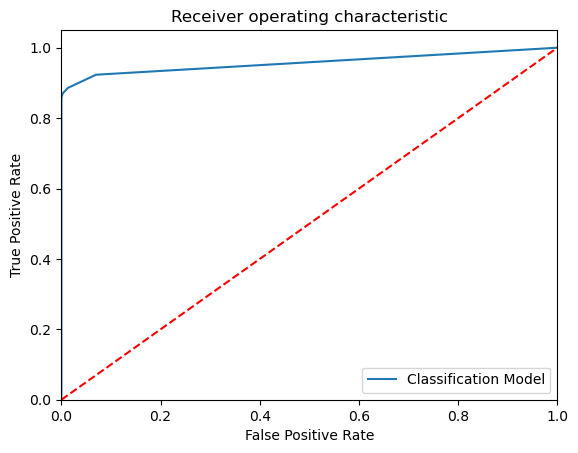

-----------------------------------------------------------------------------------------------------
KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 4681   820]
 [    3 54672]]
Outcome values : 
 4681 820 3 54672
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.85      0.92      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.93      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.6 %
Precision : 99.9 %
Recall : 85.1 %
F1 Score : 0.919
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 92.6 %
MCC : 0.915
roc_auc_score: 0.925


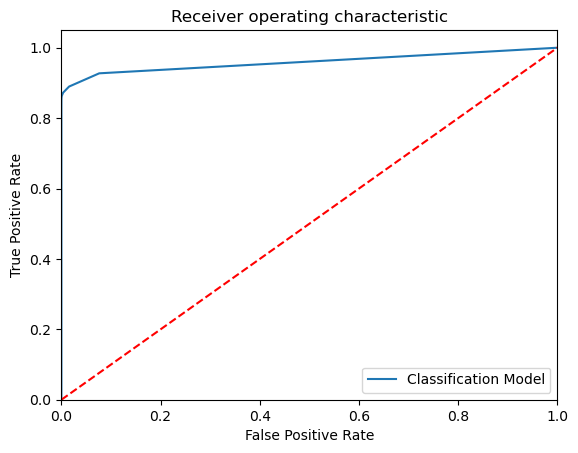

-----------------------------------------------------------------------------------------------------


In [252]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 11, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #--------------------------------------------------------tp, fn, fp, tn
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score': roc_auc_score(actual, predicted),
               'Balanced Accuracy': balanced_accuracy}
    KNNResults = KNNResults.append(new_row, ignore_index=True)
    #--------------------------------------------------------
    print('-----------------------------------------------------------------------------------------------------')

In [253]:
KNNResults

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,4796,705,542,54133,0.979,0.898,0.872,0.885,0.990,0.874,0.930964,0.931
1,KNeighborsClassifier(n_neighbors=2),2,4695,806,31,54644,0.986,0.993,0.853,0.918,0.999,0.914,0.926457,0.926
2,KNeighborsClassifier(n_neighbors=3),3,4755,746,88,54587,0.986,0.982,0.864,0.919,0.998,0.914,0.931389,0.931
3,KNeighborsClassifier(n_neighbors=4),4,4719,782,6,54669,0.987,0.999,0.858,0.923,1.000,0.919,0.928867,0.929
4,KNeighborsClassifier(),5,4735,766,34,54641,0.987,0.993,0.861,0.922,0.999,0.918,0.930065,0.930
5,KNeighborsClassifier(n_neighbors=6),6,4702,799,6,54669,0.987,0.999,0.855,0.921,1.000,0.917,0.927322,0.928
6,KNeighborsClassifier(n_neighbors=7),7,4718,783,9,54666,0.987,0.998,0.858,0.923,1.000,0.919,0.928749,0.929
7,KNeighborsClassifier(n_neighbors=8),8,4697,804,5,54670,0.987,0.999,0.854,0.921,1.000,0.917,0.926877,0.927
8,KNeighborsClassifier(n_neighbors=9),9,4706,795,8,54667,0.987,0.998,0.855,0.921,1.000,0.917,0.927667,0.928
9,KNeighborsClassifier(n_neighbors=10),10,4681,820,3,54672,0.986,0.999,0.851,0.919,1.000,0.915,0.925441,0.926


In [254]:
#After comparision above table we can say that at k=3 we get best result for KNN algorithm

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 4735   766]
 [   34 54641]]
Outcome values : 
 4735 766 34 54641
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.86      0.92      5501
           0       0.99      1.00      0.99     54675

    accuracy                           0.99     60176
   macro avg       0.99      0.93      0.96     60176
weighted avg       0.99      0.99      0.99     60176

Accuracy : 98.7 %
Precision : 99.3 %
Recall : 86.1 %
F1 Score : 0.922
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 93.0 %
MCC : 0.918
roc_auc_score: 0.93


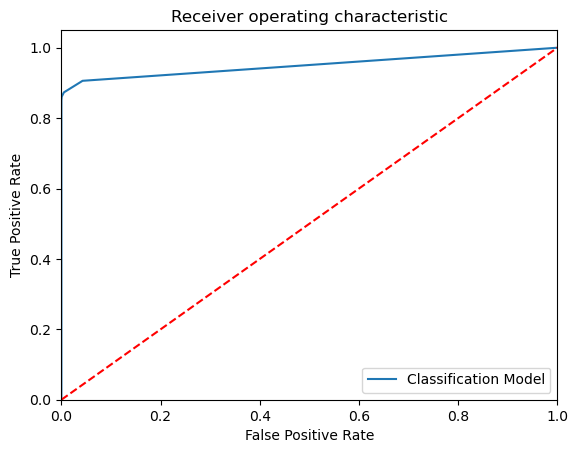

-----------------------------------------------------------------------------------------------------


In [255]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

#for a in range(1, 11, 1):
    
k = a = 5
    
# Build the model
    
ModelKNN = KNeighborsClassifier(n_neighbors=k)

# Train the model
    
ModelKNN.fit(x_train, y_train)
    
# Predict the model
    
y_pred = ModelKNN.predict(x_test)
y_pred_prob = ModelKNN.predict_proba(x_test)
    
print('KNN_K_value = ', a)
    
# Print the model name
    
print('Model Name: ', ModelKNN)
    
# confusion matrix in sklearn
    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    
# actual values
    
actual = y_test
    
# predicted values
    
predicted = y_pred
    
# confusion matrix
    
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
    
# outcome values order in sklearn
    
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
    
# classification report for precision, recall f1-score and accuracy
    
C_Report = classification_report(actual,predicted,labels=[1,0])
    
print('Classification report : \n', C_Report)
    
# calculating the metrics
    
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
    
from math import sqrt
    
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)
    
# Area under ROC curve 
    
from sklearn.metrics import roc_curve, roc_auc_score
    
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
# ROC Curve
    
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#--------------------------------------------------------tp, fn, fp, tn
new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score': roc_auc_score(actual, predicted),
               'Balanced Accuracy': balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)
#--------------------------------------------------------
print('-----------------------------------------------------------------------------------------------------')

In [256]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,KNN K Value
0,LogisticRegression(),4840,661,56,54619,0.988,0.989,0.880,0.931,0.999,MCC,0.939408,0.940,NaN
1,DecisionTreeClassifier(),4946,555,801,53874,0.977,0.861,0.899,0.879,0.985,MCC,0.942230,0.942,NaN
2,"(DecisionTreeClassifier(max_features='sqrt', r...",4893,608,46,54629,0.989,0.991,0.889,0.937,0.999,MCC,0.944317,0.944,NaN
3,"(ExtraTreeClassifier(random_state=1288868412),...",4892,609,45,54630,0.989,0.991,0.889,0.937,0.999,MCC,0.944235,0.944,NaN
4,KNeighborsClassifier(),4735,766,34,54641,0.987,0.993,0.861,0.922,0.999,0.918,0.930065,0.930,5.0


In [257]:
# Predict the values with KNeighborsClassifier algorithm

y_predF = ModelKNN.predict(x_test)

In [258]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
65354,12/5/2017,KT-188467281,Car,1624.15,IA,NV,50,Female,Married,High School,Carpenter,51,Pleasure,16405,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,5.20,Cadillac,14934.58,Semi Urban,Major,No,0,0
20412,5/15/2019,FJ-172548813,Car,1265.57,EA,AZ,47,Male,Single,Bachelors,Architect,3,Business,32231,1,1,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Mercedes,39538.95,Semi Urban,Major,No,0,0
166228,5/22/2019,DM-126859034,Car,1548.21,IA,CA,22,Male,Single,High School,Student,4,Pleasure,16190,0,0,Basic,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,29568.23,Semi Urban,Major,No,0,0
90368,12/24/2013,BA-148567144,Truck,1736.04,EA,CA,50,Male,Married,PhD,Teacher,17,Pleasure,16053,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Hyundai,23942.86,Semi Urban,Major,No,0,0
135262,1/2/2018,PK-160320650,Truck,1539.64,IA,CA,43,Female,Married,PhD,driver,22,Pleasure,24838,1,1,Balanced,CL000028821,No,9/30/2018,No,No,No,18.79,Mercedes,72795.41,Semi Urban,Minor,No,0,0


In [259]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [260]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
42482,12/30/2018,RY-196798661,Van,1389.11,IA,OR,46,Male,Divorced,Bachelors,Engineer,33,Pleasure,26480,1,2,Enhanced,CL000009643,Yes,2/15/2020,Yes,No,Yes,8064.02,Alpha Romeo,39951.19,Rural,Major,Yes,0,0,NaN
178746,12/4/2017,IS-136769105,Car,1768.06,EA,CA,51,Female,Single,Bachelors,Worker,38,Pleasure,19072,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Nissan,14923.35,Semi Urban,Major,No,0,0,NaN
195134,8/4/2016,WQ-182551822,Car,1606.97,IA,AZ,90,Male,Married,PhD,Manager,61,Business,31390,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Ford,74505.82,Semi Urban,Major,No,1,0,100.0
15768,2/18/2015,RO-158580682,Car,1528.82,IA,NV,65,Male,Married,High School,Carpenter,55,Business,30208,1,2,Enhanced,CL144120603,Yes,9/30/2018,No,No,No,0.00,Bugatti,43025.90,Semi Urban,Major,No,0,0,NaN
116266,11/20/2016,KI-136516968,Car,1537.27,EA,OR,41,Male,Married,Bachelors,Teacher,30,Business,14312,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,8.22,Toyota,24410.53,Semi Urban,Major,No,0,0,NaN


In [261]:
KNeighbors_Classifier_analysis=ResultsFinal.copy()

In [262]:
#Export Data Frame to Excel
KNeighbors_Classifier_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_un_sampling\\KNeighbors_Classifier_analysis.xlsx")

In [263]:
#6TH-ALGORITHM


In [264]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,2,1,0
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,2,1,0
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,2,1,0
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,2,1,0
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,2,1,0


In [265]:
# Split the data and copy 10% data (stratified split on target variable) to new dataset 

Auto_Claim_T = Auto_Claim_new.groupby('Claimed', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Display the shape

Auto_Claim_T.shape

(26434, 29)

In [266]:
# Identify the Independent and Target variables

IndepVar = []
for col in Auto_Claim_T.columns:
    if col != 'Claimed':
        IndepVar.append(col)

TargetVar = 'Claimed'

x = Auto_Claim_T[IndepVar]
y = Auto_Claim_T[TargetVar]

In [267]:
# Random undersampling can be implemented using the RandomUnderSampler class

from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.10)

# fit and apply the transform
x_over, y_over = undersample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(20064, 28)
(20064,)


In [268]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((14044, 28), (6020, 28), (14044,), (6020,))

In [269]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [270]:
# Load the results dataset

EMResults = pd.read_csv(r"C:\Users\sriha\Data Science\CAPSTONE PROJECT\SR_20B91A04J11\EMResults.csv", header=0)



Model Name:  SVC(kernel='linear', probability=True)
Confusion matrix : 
 [[ 468   75]
 [   2 5475]]
Outcome values : 
 468 75 2 5475
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92       543
           0       0.99      1.00      0.99      5477

    accuracy                           0.99      6020
   macro avg       0.99      0.93      0.96      6020
weighted avg       0.99      0.99      0.99      6020

Accuracy : 98.7 %
Precision : 99.6 %
Recall : 86.2 %
F1 Score : 0.924
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 93.1 %
MCC : 0.92
roc_auc_score: 0.931


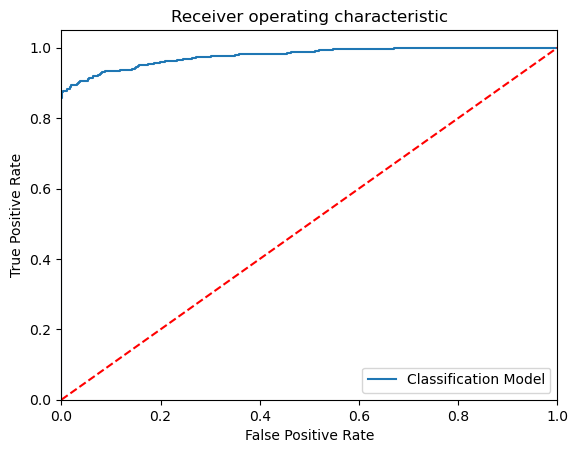

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[ 468   75]
 [   2 5475]]
Outcome values : 
 468 75 2 5475
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92       543
           0       0.99      1.00      0.99      5477

    accuracy                           0.99      6020
   macro avg       0.99      0.93      0.96      6020
weighted avg       0.99      0.99      0.99      6020

Accuracy : 98.7 %
Precision : 99.6 %
Recall : 86.2 %
F1 Score : 0.924
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 93.1 %
MCC : 0.92
roc_auc_score: 0.931


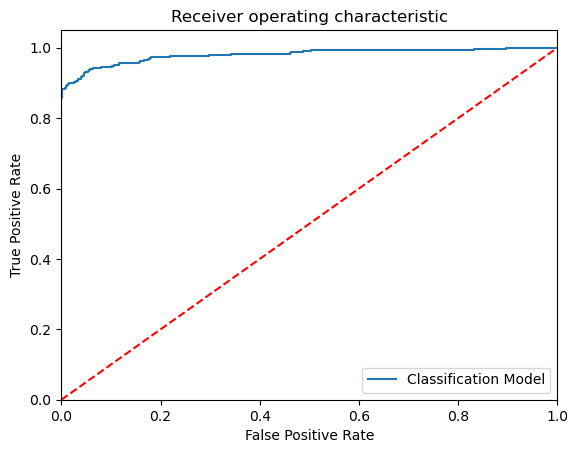

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[ 484   59]
 [  46 5431]]
Outcome values : 
 484 59 46 5431
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.89      0.90       543
           0       0.99      0.99      0.99      5477

    accuracy                           0.98      6020
   macro avg       0.95      0.94      0.95      6020
weighted avg       0.98      0.98      0.98      6020

Accuracy : 98.3 %
Precision : 91.3 %
Recall : 89.1 %
F1 Score : 0.902
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 94.2 %
MCC : 0.893
roc_auc_score: 0.941


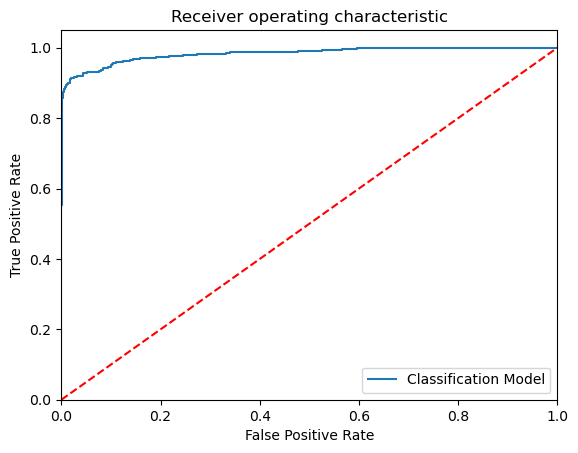

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='sigmoid', probability=True,
    random_state=42)
Confusion matrix : 
 [[ 464   79]
 [ 953 4524]]
Outcome values : 
 464 79 953 4524
Classification report : 
               precision    recall  f1-score   support

           1       0.33      0.85      0.47       543
           0       0.98      0.83      0.90      5477

    accuracy                           0.83      6020
   macro avg       0.66      0.84      0.69      6020
weighted avg       0.92      0.83      0.86      6020

Accuracy : 82.9 %
Precision : 32.7 %
Recall : 85.5 %
F1 Score : 0.473
Specificity or True Negative Rate : 82.6 %
Balanced Accuracy : 84.0 %
MCC : 0.46
roc_auc_score: 0.84


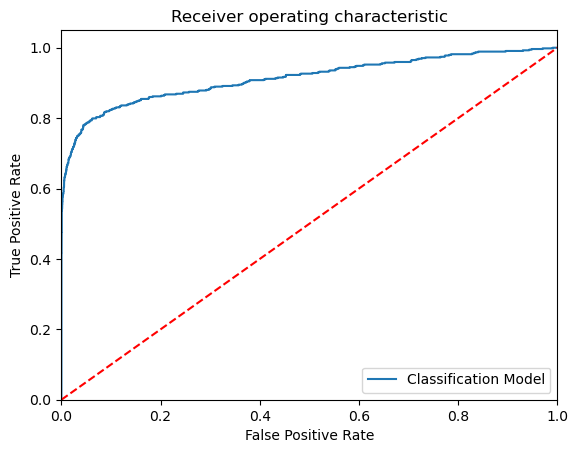

-----------------------------------------------------------------------------------------------------


In [271]:
# Build the all types of SVM Calssification models and compare the results

from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

SVMLIN = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
             probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
             max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

SVMPLY = SVC(kernel='poly', degree=2, probability=True)

SVMGSN = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

SVMSIG = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [SVMLIN, SVMPLY, SVMGSN, SVMSIG]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [272]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"SVC(kernel='linear', probability=True)",468,75,2,5475,0.987,0.996,0.862,0.924,1.000,0.920,0.930757,0.931
1,"SVC(degree=2, kernel='poly', probability=True)",468,75,2,5475,0.987,0.996,0.862,0.924,1.000,0.920,0.930757,0.931
2,"SVC(class_weight='balanced', probability=True,...",484,59,46,5431,0.983,0.913,0.891,0.902,0.992,0.893,0.941473,0.942
3,"SVC(class_weight='balanced', kernel='sigmoid',...",464,79,953,4524,0.829,0.327,0.855,0.473,0.826,0.460,0.840256,0.840


In [273]:
#Out of all svm models we are getting the best results for SVM-#Polynomial Kernel

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[ 468   75]
 [   2 5475]]
Outcome values : 
 468 75 2 5475
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92       543
           0       0.99      1.00      0.99      5477

    accuracy                           0.99      6020
   macro avg       0.99      0.93      0.96      6020
weighted avg       0.99      0.99      0.99      6020

Accuracy : 98.7 %
Precision : 99.6 %
Recall : 86.2 %
F1 Score : 0.924
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 93.1 %
MCC : 0.92
roc_auc_score: 0.931


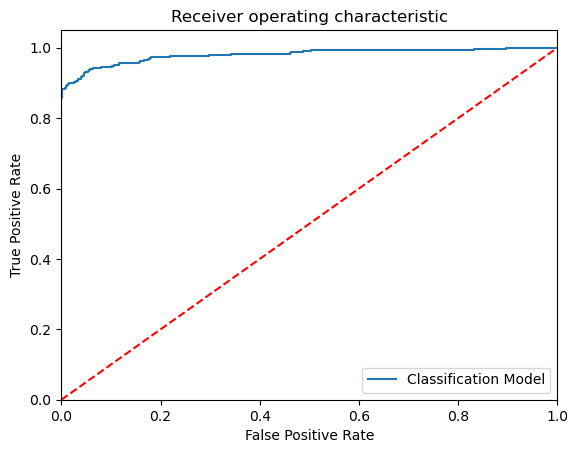

-----------------------------------------------------------------------------------------------------


In [274]:
# Training the SVM algorithm

from sklearn.svm import SVC

CustPrb_TSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

CustPrb_TSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = CustPrb_TSVMPoly.predict(x_test)
y_pred_prob = CustPrb_TSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,CustPrb_TSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)
#---

In [275]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,KNN K Value
0,LogisticRegression(),4840,661,56,54619,0.988,0.989,0.880,0.931,0.999,MCC,0.939408,0.940,NaN
1,DecisionTreeClassifier(),4946,555,801,53874,0.977,0.861,0.899,0.879,0.985,MCC,0.942230,0.942,NaN
2,"(DecisionTreeClassifier(max_features='sqrt', r...",4893,608,46,54629,0.989,0.991,0.889,0.937,0.999,MCC,0.944317,0.944,NaN
3,"(ExtraTreeClassifier(random_state=1288868412),...",4892,609,45,54630,0.989,0.991,0.889,0.937,0.999,MCC,0.944235,0.944,NaN
4,KNeighborsClassifier(),4735,766,34,54641,0.987,0.993,0.861,0.922,0.999,0.918,0.930065,0.930,5.0
5,SVM - Polynominal,468,75,2,5475,0.987,0.996,0.862,0.924,1.000,0.92,0.930757,0.931,NaN


In [276]:
# Predict the values with SVM - Polynominal algorithm

y_predF = CustPrb_TSVMPoly.predict(x_test)

In [277]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
10194,5/24/2017,MC-174571640,Car,1685.41,EA,CA,29,Male,Married,Masters,Engineer,19,Pleasure,15662,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Chevrolet,17559.16,Semi Urban,Major,No,0,0
12596,1/22/2018,TI-169224777,Truck,1502.74,EA,CA,56,Female,Married,Masters,Engineer,37,Commute,14336,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,9.85,Volvo,38563.38,Semi Urban,Major,No,0,0
9527,4/28/2017,JO-140036043,Car,1595.83,EA,AZ,70,Female,Married,High School,Carpenter,55,Business,32791,1,1,Balanced,CL144120603,No,9/30/2018,No,No,No,9.40,Mercedes,39450.91,Semi Urban,Major,No,0,0
6074,11/18/2018,PE-167084396,Car,1682.86,EA,AZ,87,Female,Married,High School,painter,69,Business,14582,0,0,Basic,CL144120603,No,9/30/2018,No,No,No,0.00,Ford,19888.86,Semi Urban,Major,No,0,0
17,7/4/2015,MR-128596504,Car,1748.78,IA,AZ,49,Female,Married,Bachelors,Engineer,48,Business,23622,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Lincoln,33207.27,Semi Urban,Major,No,0,0


In [278]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [279]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
3223,11/27/2019,AA-149971482,Truck,1418.86,IA,NV,78,Male,Married,High School,Carpenter,50,Pleasure,23780,0,1,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,Chevrolet,18990.92,Semi Urban,Major,No,0,0,NaN
15448,12/21/2013,PA-189635125,Car,1528.44,IA,OR,56,Male,Married,High School,Carpenter,32,Pleasure,29315,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Dodge,24539.78,Semi Urban,Major,No,0,0,NaN
13436,6/6/2017,EW-130865087,Car,1483.05,EA,CA,38,Male,Married,High School,Carpenter,26,Pleasure,14286,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,5.76,Toyota,27612.14,Semi Urban,Major,No,0,0,NaN
19425,4/22/2017,XT-155541469,Van,1651.40,EA,CA,51,Male,Married,High School,Carpenter,15,Pleasure,14489,1,1,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Hyundai,18684.78,Semi Urban,Major,No,1,1,0.0
6095,7/23/2017,YC-188507158,Van,1402.74,EA,CA,31,Female,Single,Bachelors,Teacher,17,Pleasure,16361,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,1.75,Hyundai,23257.33,Semi Urban,Major,No,0,0,NaN


In [280]:
SVM_Polynomial_Kernel_analysis=ResultsFinal.copy()

In [281]:
#Export Data Frame to Excel
SVM_Polynomial_Kernel_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_un_sampling\\SVM_Polynomial_Kernel_analysis.xlsx")

In [282]:
#STEP-5:SELECTION OF DEPENDENT AND INDEPENDENT VARIABLES

In [283]:
# Identify the Independent and Target variables

IndepVar = []
for col in Auto_Claim_new.columns:
    if col != 'Claimed':
        IndepVar.append(col)

TargetVar = 'Claimed'

x = Auto_Claim_new[IndepVar]
y = Auto_Claim_new[TargetVar]

In [284]:
# Random undersampling can be implemented using the RandomUnderSampler class

from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.10)

# fit and apply the transform
x_over, y_over = undersample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(200585, 28)
(200585,)


In [285]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((185037, 28), (79302, 28), (185037,), (79302,))

In [286]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [287]:
#7TH-ALGORITHM

In [288]:
#Naive Bayes model (GaussianNB) Algorithm

Confusion matrix : 
 [[ 5017   484]
 [ 1340 72461]]
Outcome values : 
 5017 484 1340 72461
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.91      0.85      5501
           0       0.99      0.98      0.99     73801

    accuracy                           0.98     79302
   macro avg       0.89      0.95      0.92     79302
weighted avg       0.98      0.98      0.98     79302

Accuracy : 97.7 %
Precision : 78.9 %
Recall : 91.2 %
F1 Score : 0.846
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 94.7 %
MCC : 0.836
roc_auc_score: 0.947


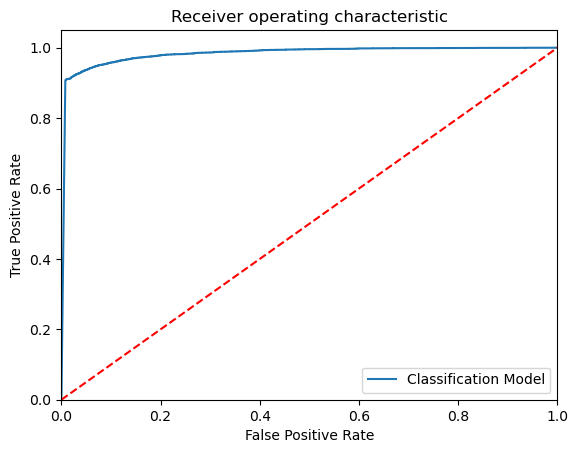

-----------------------------------------------------------------------------------------------------


In [289]:
#NAIVE BAES MODEL

# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelGNB.predict(x_test)
y_pred_prob = modelGNB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelGNB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
 #----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : modelGNB,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)

In [290]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,KNN K Value
0,LogisticRegression(),4840,661,56,54619,0.988,0.989,0.880,0.931,0.999,MCC,0.939408,0.940,NaN
1,DecisionTreeClassifier(),4946,555,801,53874,0.977,0.861,0.899,0.879,0.985,MCC,0.942230,0.942,NaN
2,"(DecisionTreeClassifier(max_features='sqrt', r...",4893,608,46,54629,0.989,0.991,0.889,0.937,0.999,MCC,0.944317,0.944,NaN
3,"(ExtraTreeClassifier(random_state=1288868412),...",4892,609,45,54630,0.989,0.991,0.889,0.937,0.999,MCC,0.944235,0.944,NaN
4,KNeighborsClassifier(),4735,766,34,54641,0.987,0.993,0.861,0.922,0.999,0.918,0.930065,0.930,5.0
5,SVM - Polynominal,468,75,2,5475,0.987,0.996,0.862,0.924,1.000,0.92,0.930757,0.931,NaN
6,GaussianNB(),5017,484,1340,72461,0.977,0.789,0.912,0.846,0.982,MCC,0.946930,0.947,NaN


In [291]:
# Predict the values with Naive Bayes model (GaussianNB) Algorithm

y_predF = modelGNB.predict(x_test)

In [292]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
176800,6/5/2015,AT-143393367,Car,1443.24,IA,NV,26,Male,Single,High School,Student,3,Pleasure,13645,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,25088.30,Semi Urban,Major,No,0,0
186289,10/21/2017,BX-125415826,Truck,1617.29,EA,NV,68,Male,Married,PhD,CEO,34,Pleasure,31112,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,2.91,Dodge,27248.03,Semi Urban,Major,No,0,0
267092,4/20/2016,XH-175664180,Van,1581.12,IA,OR,19,Male,Married,High School,Arts,2,Pleasure,10783,0,0,Basic,CL144120603,Yes,1/2/2019,No,No,No,0.00,Dodge,17921.00,Semi Urban,Major,No,0,0
71787,8/1/2018,QO-178335127,Car,1772.71,IA,CA,20,Male,Single,Bachelors,Arts,3,Pleasure,15766,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,1.23,Hyundai,13923.02,Semi Urban,Major,No,0,0
172028,5/1/2018,KZ-196421806,Car,1353.39,IA,OR,55,Male,Married,Masters,Engineer,36,Commute,17992,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Ferrari,19052.78,Semi Urban,Major,No,0,0


In [293]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [294]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
183163,6/5/2018,CC-164991182,Car,1608.92,EA,AZ,63,Male,Married,Bachelors,Architect,38,Business,30868,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,29.41,Kia,38596.91,Semi Urban,Major,No,0,0,NaN
227180,11/7/2017,VH-191964090,Car,1487.78,IA,AZ,67,Male,Married,High School,Carpenter,52,Business,31836,0,1,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Bugatti,43261.90,Semi Urban,Major,No,0,0,NaN
164815,12/26/2013,EF-172903028,Van,1600.93,IA,CA,28,Female,Married,High School,ITENGINEER,13,Pleasure,20889,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,GM,30431.04,Semi Urban,Major,No,0,0,NaN
125554,10/3/2016,TC-199702830,Truck,1765.22,EA,CA,43,Male,Married,Bachelors,Engineer,28,Pleasure,26078,1,1,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Hyundai,17972.46,Semi Urban,Major,No,0,0,NaN
6367,6/13/2015,ZJ-149577988,Car,1838.99,EA,NV,42,Male,Married,High School,painter,21,Commute,25612,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,18364.00,Semi Urban,Major,No,0,0,NaN


In [295]:
Naive_Bayes_classifier_analysis=ResultsFinal.copy()

In [296]:
#Export Data Frame to Excel
Naive_Bayes_classifier_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_un_sampling\\Naive_Bayes_classifier_analysis.xlsx")

In [297]:
#Calssification models and comparision of their results

In [298]:
# Load the Results dataset

CSResults_1 = pd.read_csv(r"C:\Users\sriha\Data Science\CAPSTONE PROJECT\SR_20B91A04J11\CSResults_1.csv", header=0)

CSResults_1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 4836   665]
 [   58 73743]]
Outcome values : 
 4836 665 58 73743
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.88      0.93      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.94      0.96     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.1 %
Precision : 98.8 %
Recall : 87.9 %
F1 Score : 0.93
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 93.9 %
MCC : 0.927
roc_auc_score: 0.939


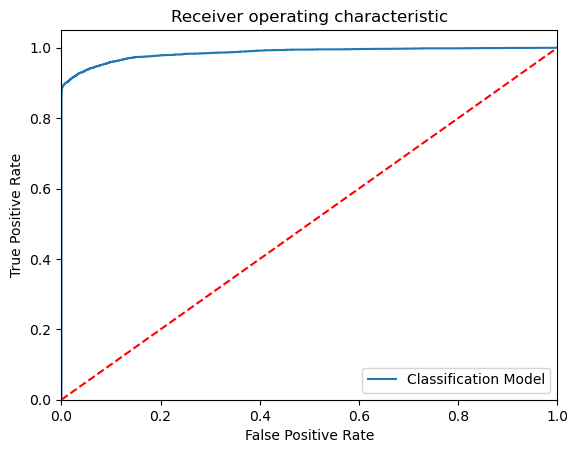

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 4933   568]
 [  701 73100]]
Outcome values : 
 4933 568 701 73100
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.90      0.89      5501
           0       0.99      0.99      0.99     73801

    accuracy                           0.98     79302
   macro avg       0.93      0.94      0.94     79302
weighted avg       0.98      0.98      0.98     79302

Accuracy : 98.4 %
Precision : 87.6 %
Recall : 89.7 %
F1 Score : 0.886
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 94.4 %
MCC : 0.878
roc_auc_score: 0.944


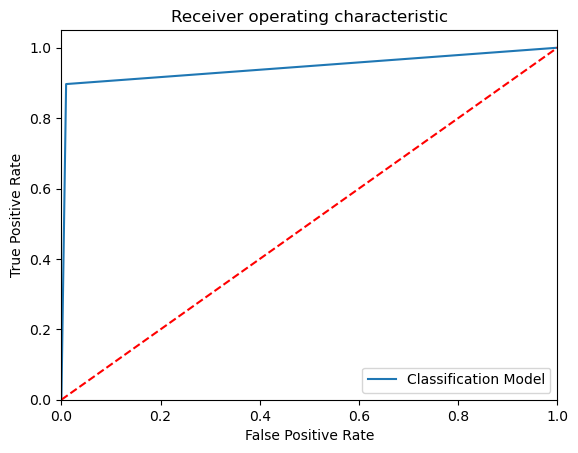

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 4894   607]
 [   34 73767]]
Outcome values : 
 4894 607 34 73767
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.94      0.97     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.2 %
Precision : 99.3 %
Recall : 89.0 %
F1 Score : 0.939
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 94.5 %
MCC : 0.936
roc_auc_score: 0.945


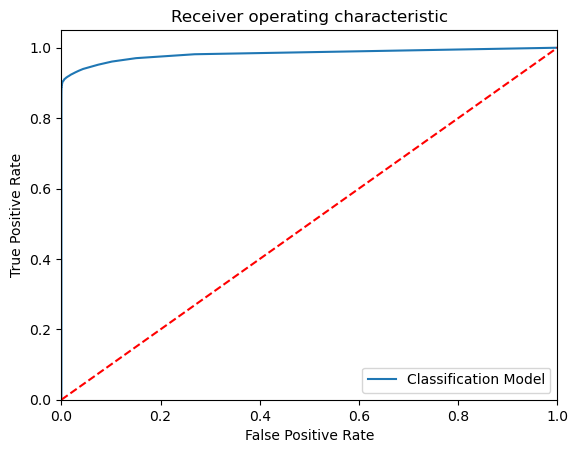

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 4899   602]
 [   45 73756]]
Outcome values : 
 4899 602 45 73756
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.94      0.97     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.2 %
Precision : 99.1 %
Recall : 89.1 %
F1 Score : 0.938
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.5 %
MCC : 0.935
roc_auc_score: 0.945


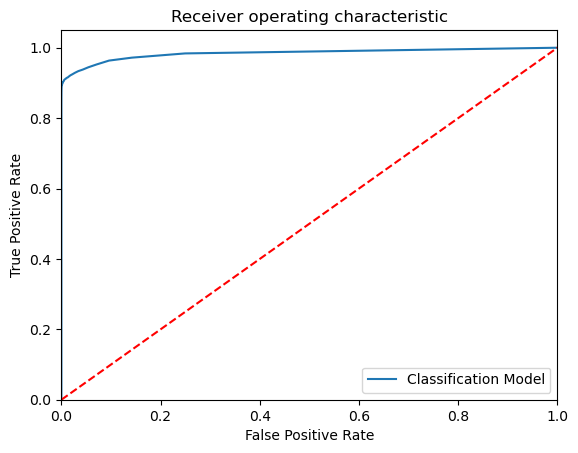

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 4745   756]
 [   28 73773]]
Outcome values : 
 4745 756 28 73773
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.86      0.92      5501
           0       0.99      1.00      0.99     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.93      0.96     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.0 %
Precision : 99.4 %
Recall : 86.3 %
F1 Score : 0.924
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 93.2 %
MCC : 0.921
roc_auc_score: 0.931


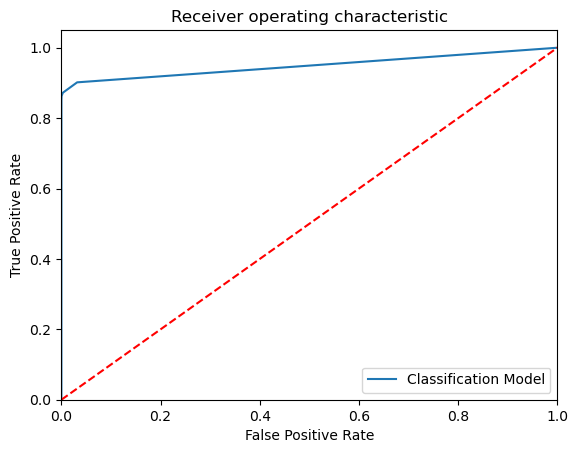

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(base_estimator=None, n_estimators=100)
Confusion matrix : 
 [[ 4908   593]
 [   65 73736]]
Outcome values : 
 4908 593 65 73736
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.95      0.97     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.2 %
Precision : 98.7 %
Recall : 89.2 %
F1 Score : 0.937
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.6 %
MCC : 0.934
roc_auc_score: 0.946


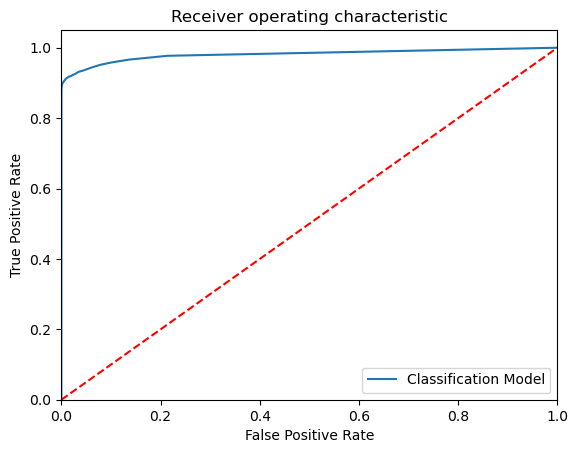

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[ 4906   595]
 [   53 73748]]
Outcome values : 
 4906 595 53 73748
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.95      0.97     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.2 %
Precision : 98.9 %
Recall : 89.2 %
F1 Score : 0.938
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.6 %
MCC : 0.935
roc_auc_score: 0.946


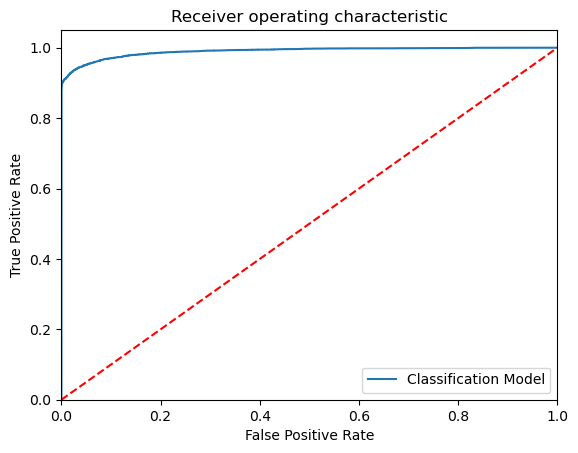

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 4917   584]
 [   68 73733]]
Outcome values : 
 4917 584 68 73733
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.95      0.97     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.2 %
Precision : 98.6 %
Recall : 89.4 %
F1 Score : 0.938
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.6 %
MCC : 0.935
roc_auc_score: 0.946


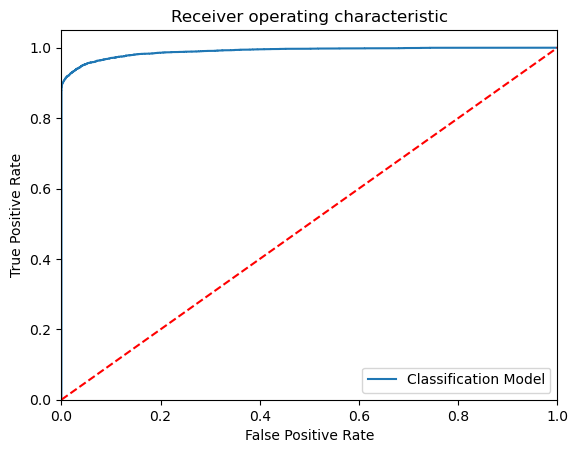

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 5017   484]
 [ 1340 72461]]
Outcome values : 
 5017 484 1340 72461
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.91      0.85      5501
           0       0.99      0.98      0.99     73801

    accuracy                           0.98     79302
   macro avg       0.89      0.95      0.92     79302
weighted avg       0.98      0.98      0.98     79302

Accuracy : 97.7 %
Precision : 78.9 %
Recall : 91.2 %
F1 Score : 0.846
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 94.7 %
MCC : 0.836
roc_auc_score: 0.947


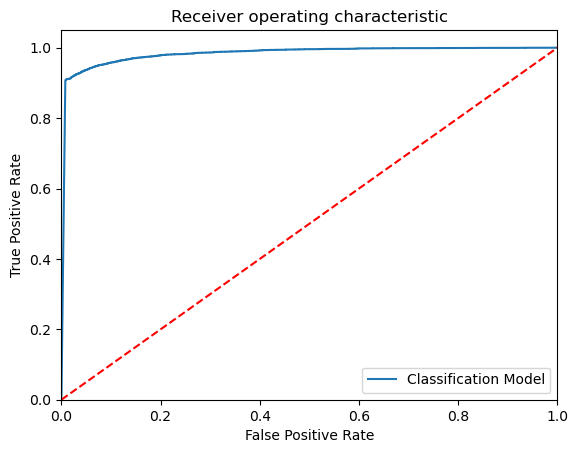

-----------------------------------------------------------------------------------------------------


In [299]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms
#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, modelBAG, ModelGB, ModelLGB, ModelGNB]
#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    CSResults_1 = CSResults_1.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [300]:
CSResults_1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),4836,665,58,73743,0.991,0.988,0.879,0.930,0.999,0.927,0.939163,0.939
1,DecisionTreeClassifier(),4933,568,701,73100,0.984,0.876,0.897,0.886,0.991,0.878,0.943624,0.944
2,"(DecisionTreeClassifier(max_features='sqrt', r...",4894,607,34,73767,0.992,0.993,0.890,0.939,1.000,0.936,0.944598,0.945
3,"(ExtraTreeClassifier(random_state=1196283482),...",4899,602,45,73756,0.992,0.991,0.891,0.938,0.999,0.935,0.944978,0.945
4,KNeighborsClassifier(),4745,756,28,73773,0.990,0.994,0.863,0.924,1.000,0.921,0.931096,0.932
5,(DecisionTreeClassifier(random_state=939070936...,4908,593,65,73736,0.992,0.987,0.892,0.937,0.999,0.934,0.945660,0.946
6,([DecisionTreeRegressor(criterion='friedman_ms...,4906,595,53,73748,0.992,0.989,0.892,0.938,0.999,0.935,0.945560,0.946
7,LGBMClassifier(),4917,584,68,73733,0.992,0.986,0.894,0.938,0.999,0.935,0.946458,0.946
8,GaussianNB(),5017,484,1340,72461,0.977,0.789,0.912,0.846,0.982,0.836,0.946930,0.947
